In [2]:
library(ggplot2)
library(latex2exp)
library(gridExtra)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Exercise 1

## Point 1

In [3]:
draws <- c(4, 1, 3, 1, 3)
mu_range <- seq(1, 7, by = 0.01)
posterior <- dgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))


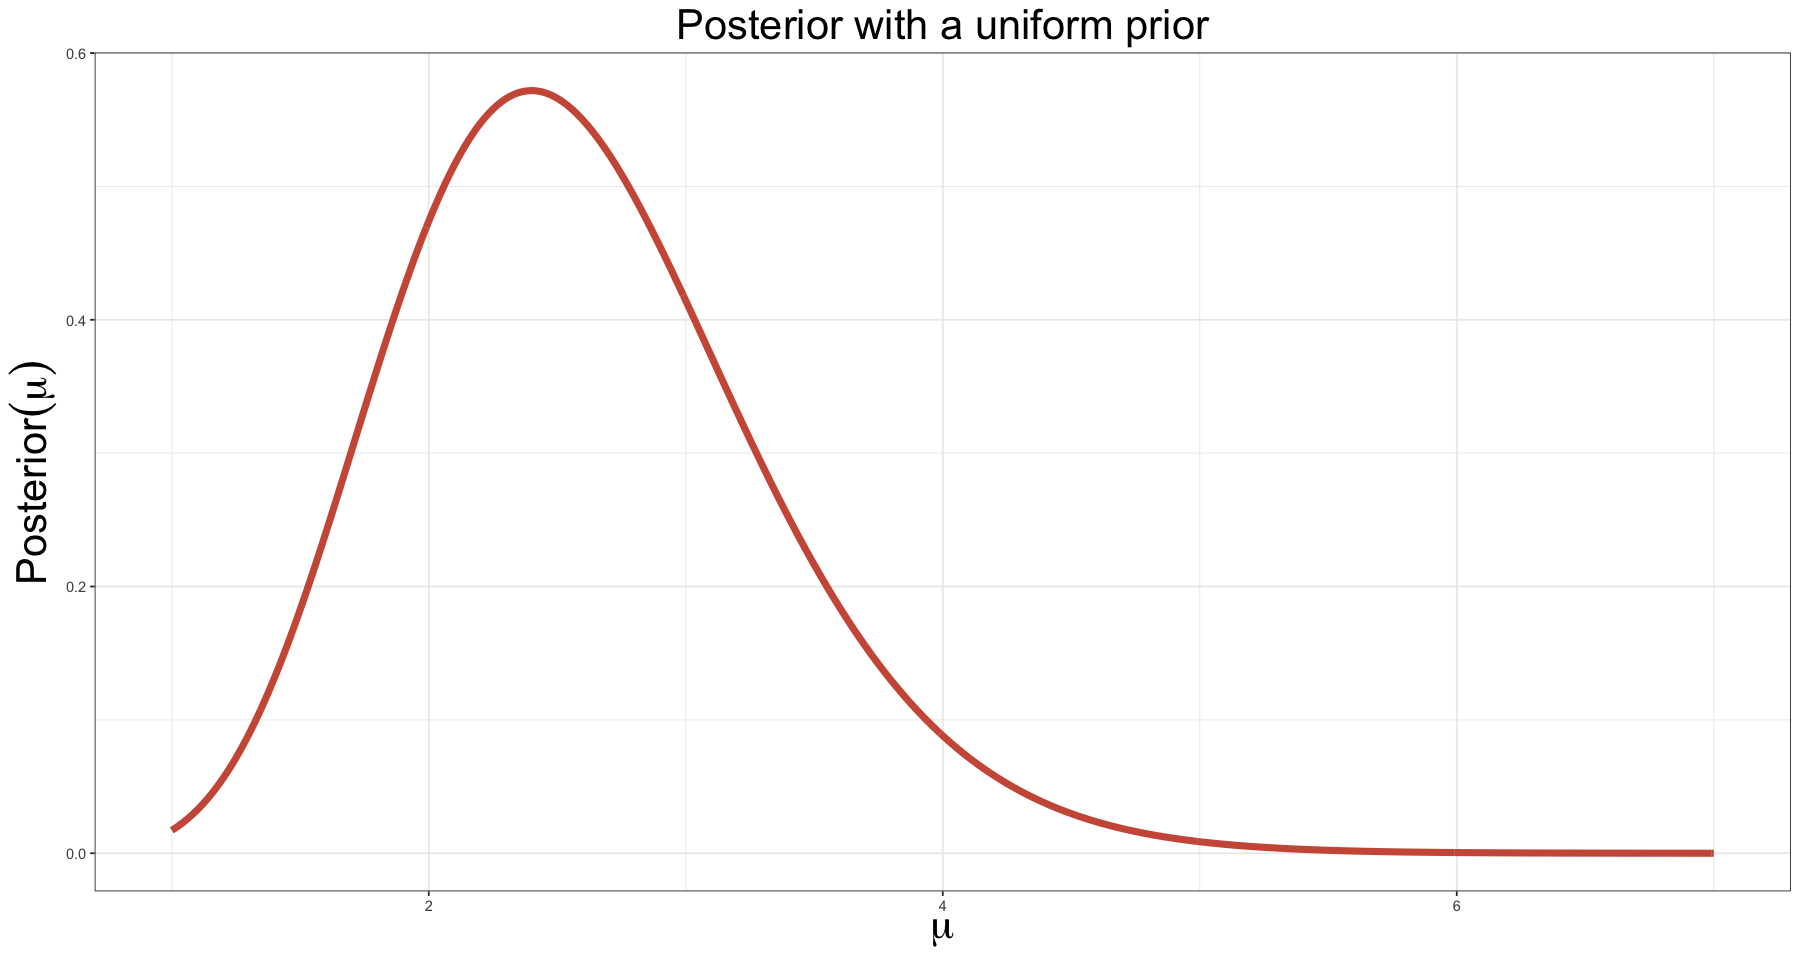

In [4]:
options(repr.plot.width=15, repr.plot.height=8)
plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior), lwd=2, color='coral3') +
        ggtitle('Posterior with a uniform prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) 

plot

In [5]:
#Analytic part
cat('The mean of the posterior distribution analitically is: ', (sum(draws) + 1)/length(draws), '\n')
cat('The variance of the posterior distribution is: ', (sum(draws) + 1)/(length(draws)^2), '\n')

The mean of the posterior distribution analitically is:  2.6 
The variance of the posterior distribution is:  0.52 


In [6]:
mean_int <- function(x){
    return(x*dgamma(x, shape=sum(draws) + 1, rate=length(draws)))
}
#Numeric part
mean <- integrate(mean_int, lower = 0, upper = Inf)

In [7]:
cat('The mean obtained with numerical integration is: ', mean$value)

The mean obtained with numerical integration is:  2.6

In [8]:
cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))
median <- mu_range[length(cumul[cumul<0.5])]

cat('The median obtained numerically is: ', median)

The median obtained numerically is:  2.53

In [9]:
var_int <- function(x){
    return((x^2)*dgamma(x, shape=sum(draws) +1 , rate=length(draws)))
}

variance <- integrate(var_int, lower = 0, upper = Inf)

cat('The variance obtained numerically is: ', variance$value - mean$value^2)

The variance obtained numerically is:  0.52

## Point 2

In [10]:
posterior_j <- dgamma(mu_range, shape=sum(draws) + 1/2, rate=length(draws))

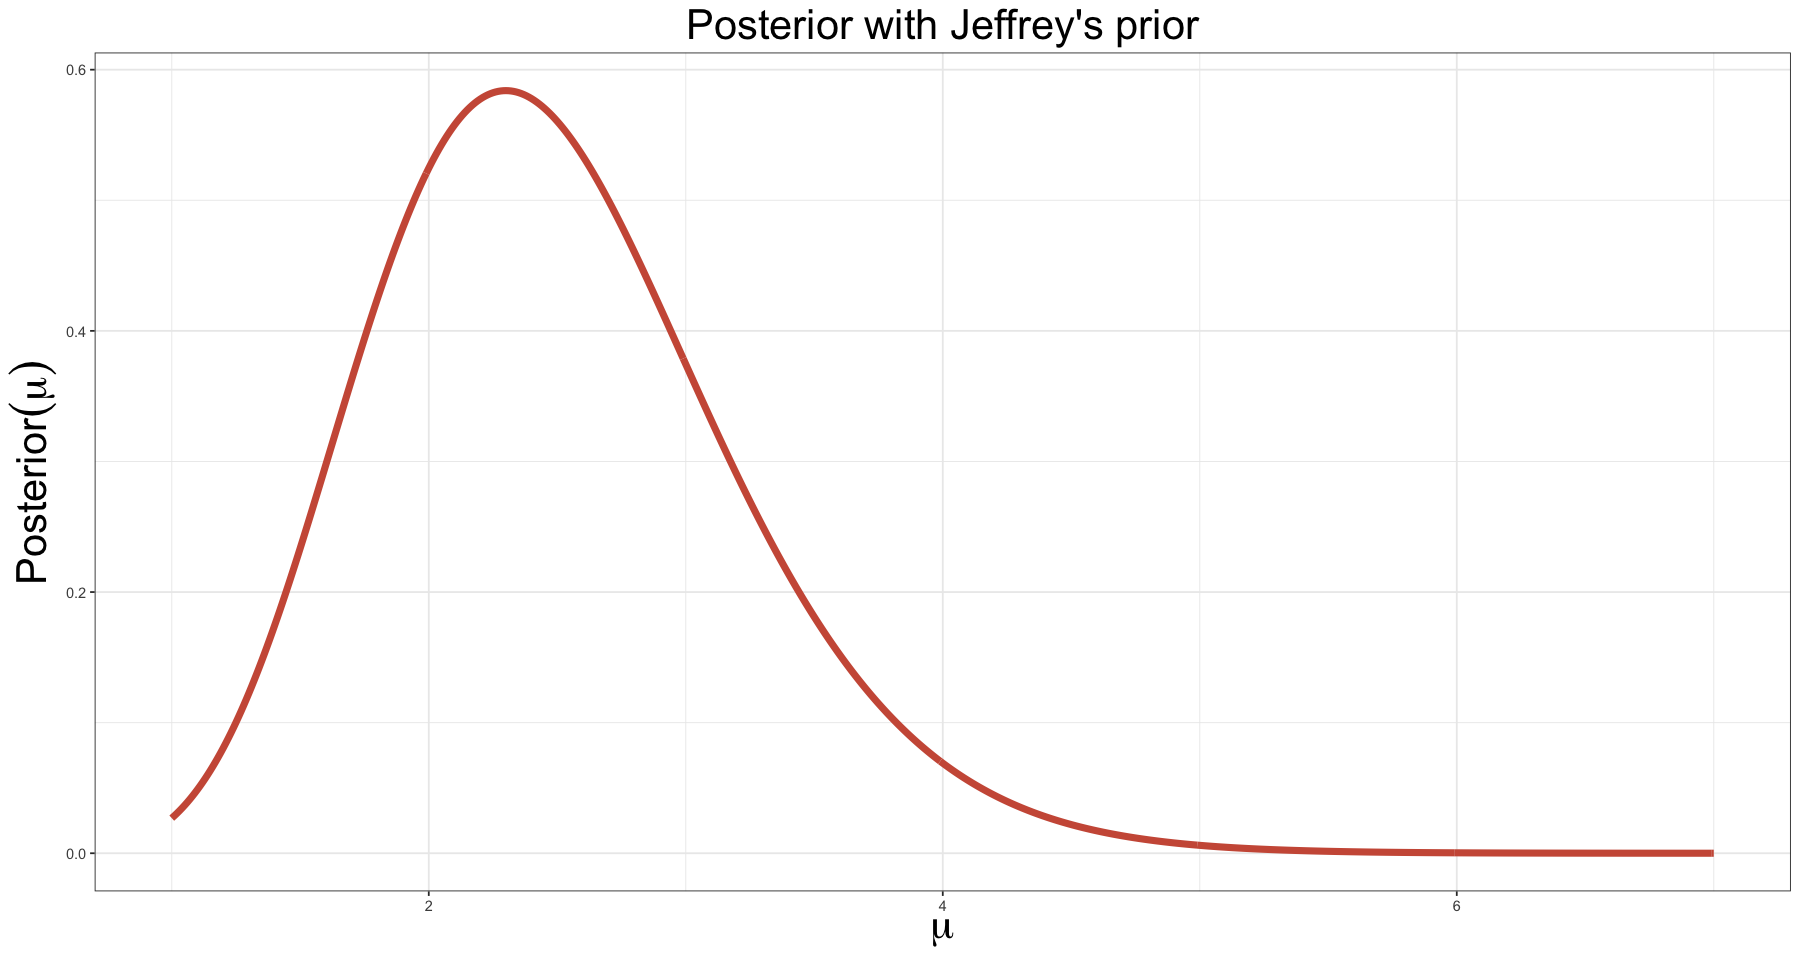

In [11]:
options(repr.plot.width=15, repr.plot.height=8)
plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior_j), lwd=2, color='coral3') +
        ggtitle('Posterior with Jeffrey\'s prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) 

plot

In [12]:
#Analytic part
cat('The mean of the posterior distribution analitically is: ', (sum(draws) + 1/2)/length(draws), '\n')
cat('The variance of the posterior distribution is: ', (sum(draws) + 1/2)/(length(draws)^2), '\n')

The mean of the posterior distribution analitically is:  2.5 
The variance of the posterior distribution is:  0.5 


In [13]:
mean_int <- function(x){
    return(x*dgamma(x, shape=sum(draws) + 1/2, rate=length(draws)))
}
#Numeric part
mean <- integrate(mean_int, lower = 0, upper = Inf)

In [14]:
cat('The mean obtained with numerical integration is: ', mean$value)

The mean obtained with numerical integration is:  2.5

In [15]:
cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))
median <- mu_range[length(cumul[cumul<0.5])]

cat('The median obtained numerically is: ', median)

The median obtained numerically is:  2.53

In [16]:
var_int <- function(x){
    return((x^2)*dgamma(x, shape=sum(draws) +1/2 , rate=length(draws)))
}

variance <- integrate(var_int, lower = 0, upper = Inf)

cat('The variance obtained numerically is: ', variance$value - mean$value^2)

The variance obtained numerically is:  0.5

## Point 3

In [17]:
#Uniform prior case

cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))

lower_bound <- mu_range[length(cumul[cumul < 0.025])]
upper_bound <- mu_range[length(cumul[cumul < 0.975])]
max_index=which.max(posterior)

x_axis <- seq(lower_bound, upper_bound, by = 0.1)
posterior_cut <- dgamma(seq(lower_bound, upper_bound, by = 0.1), shape=sum(draws) + 1, rate=length(draws))

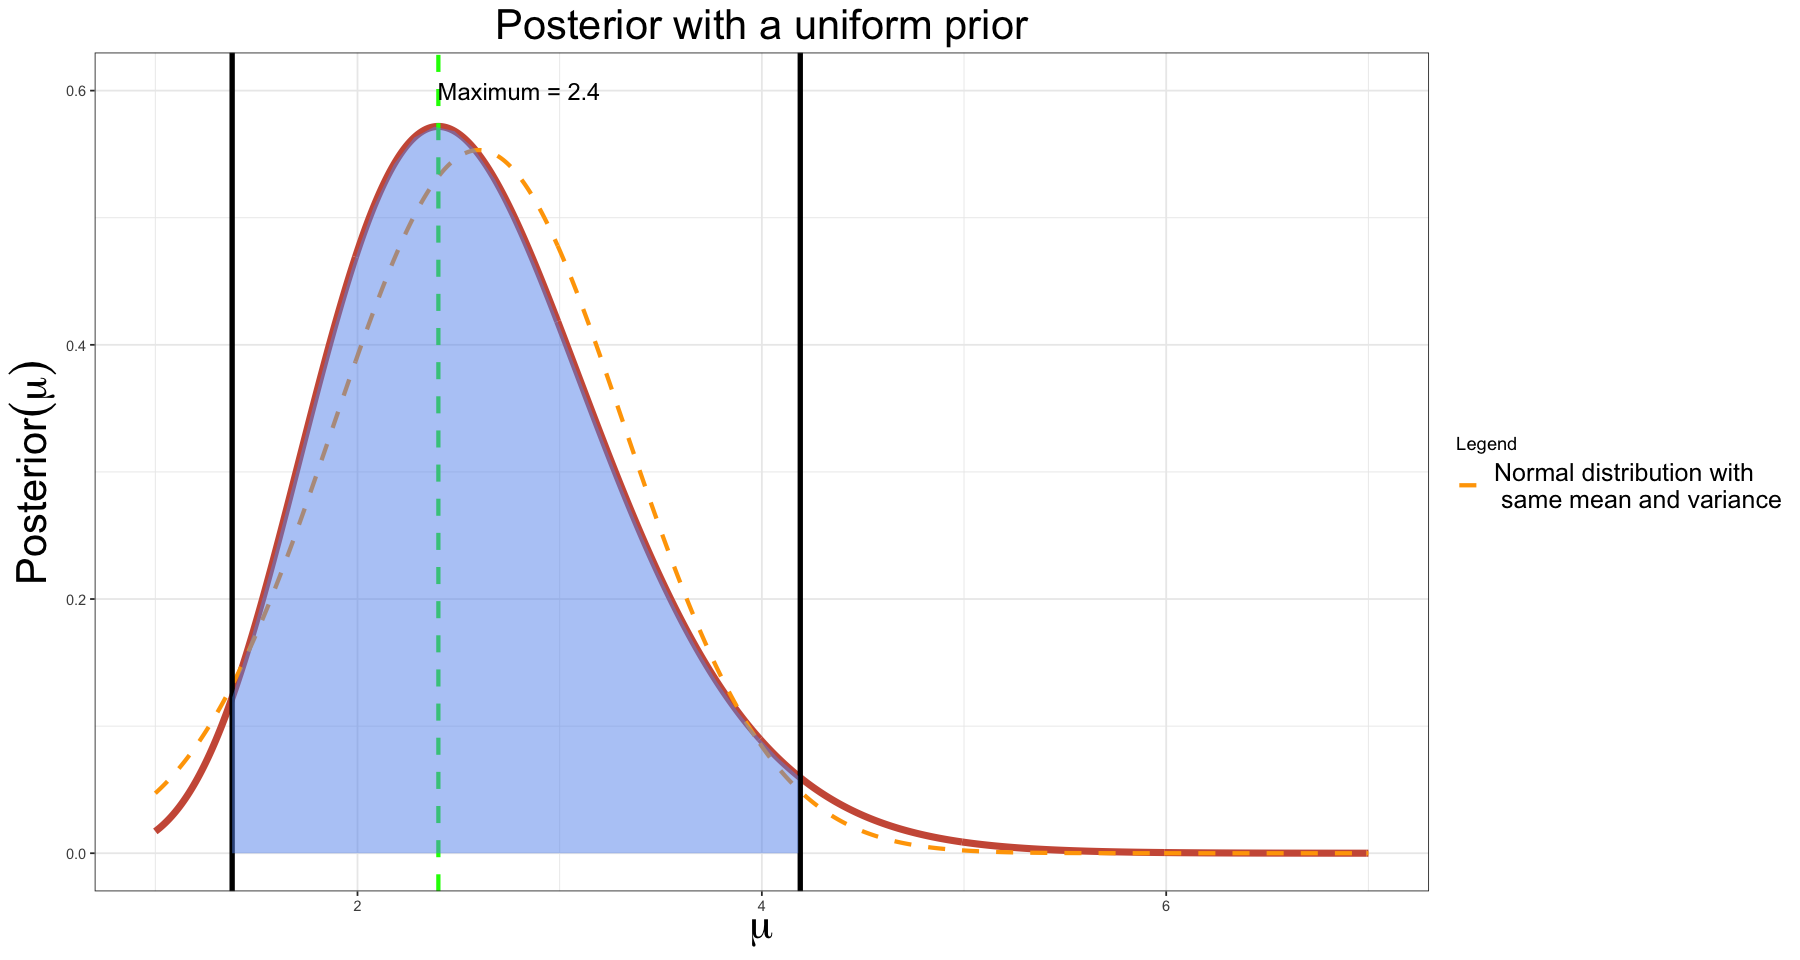

In [18]:

plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior), lwd=2, color='coral3') +
        ggtitle('Posterior with a uniform prior') +
        geom_line(aes(x = mu_range, y = dnorm(x=mu_range, mean = 2.6, sd = sqrt(0.52)), color='Normal distribution with \n same mean and variance'), linetype='dashed', lwd=1.2) +       
        labs(color='Legend') +
        
        scale_color_manual(values = c('Normal distribution with \n same mean and variance' = 'orange')) +
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) +
        theme(legend.text = element_text(size=15)) +
        geom_vline(xintercept = lower_bound, lwd=1.5) +
        geom_vline(xintercept = upper_bound, lwd=1.5) +
        geom_vline(aes(xintercept=mu_range[max_index]), linetype='dashed', lwd=1.2, color='green') +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, by = 0.1), ymin=0, ymax=posterior_cut), fill='cornflowerblue', alpha=0.5)+
        


plot

In [19]:
#Jeffrey’s prior case

cumul <- pgamma(mu_range, shape=sum(draws) + 1/2, rate=length(draws))

lower_bound <- mu_range[length(cumul[cumul < 0.025])]
upper_bound <- mu_range[length(cumul[cumul < 0.975])]
max_index=which.max(posterior_j)

x_axis <- seq(lower_bound, upper_bound, by = 0.1)
posterior_cut <- dgamma(seq(lower_bound, upper_bound, by = 0.01), shape=sum(draws) + 1/2, rate=length(draws))

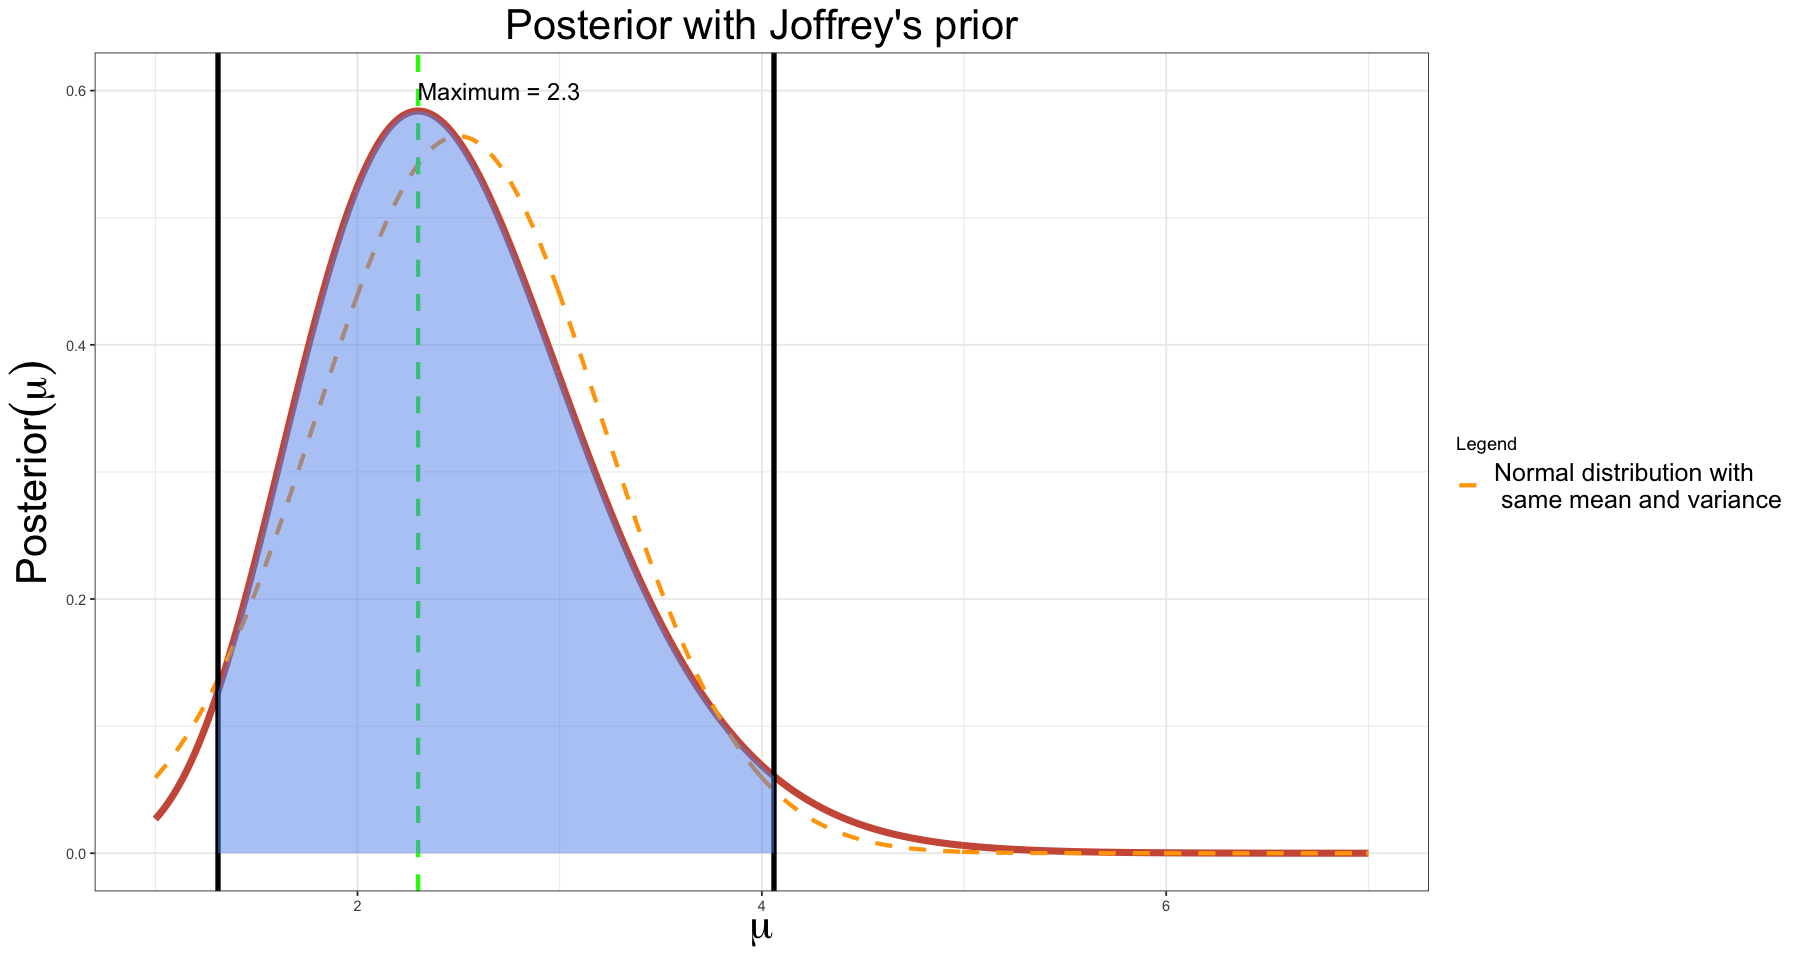

In [20]:

plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior_j), lwd=2, color='coral3') +
        ggtitle('Posterior with Joffrey\'s prior') +
        geom_line(aes(x = mu_range, y = dnorm(x=mu_range, mean = 2.5, sd = sqrt(0.5)), color='Normal distribution with \n same mean and variance'), linetype='dashed', lwd=1.2) +       
        labs(color='Legend') +
        
        scale_color_manual(values = c('Normal distribution with \n same mean and variance' = 'orange')) +
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) +
        theme(legend.text = element_text(size=15)) +
        geom_vline(xintercept = lower_bound, lwd=1.5) +
        geom_vline(xintercept = upper_bound, lwd=1.5) +
        geom_vline(aes(xintercept=mu_range[max_index]), linetype='dashed', lwd=1.2, color='green') +
        annotate('text', x=mu_range[max_index]+0.4, y=0.6 , label=sprintf("Maximum = %s", mu_range[max_index]), size=5) +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, by = 0.01), ymin=0, ymax=posterior_cut), fill='cornflowerblue', alpha=0.5)

plot

# Exercise 2

Working under the assumption that the alpha and beta are independent we can factorize the priors.
We consider as a prior for the beta point a uniform distribution, like we did for alpha, so the posterior is still proportional to the 
likelihood.

In [21]:
beta_0 <- 1
alpha_0 <- 1
set.seed(123)
n_sample <- 2000
theta_k <- runif(n_sample+1,-pi/2,pi/2)
data     <- beta_0 * tan(theta_k) + alpha_0

In [22]:
x_min <- -7
x_max <- 7
y_min <- 0
y_max <- 7
h <- (x_max - x_min)/n_sample
g <- (y_max-y_min)/n_sample

In [23]:
a <- seq(x_min, by=h, length.out=n_sample)
b <- seq(y_min, by= g, length.out=n_sample)

In [24]:
log_likelihood <- function(a, b, data){
    
    logL = 0
    for(x in data){

    logL <- logL + (log(b / (b^2 + (x -a)^2)))
    }
    return(logL)
}

In [25]:
n_str = Inf
while (as.numeric(n_str) > n_sample){
n_str <- readline("Enter data set dimension (less than n_sample): ") 
}
dt <- data[1:n_str]

Enter data set dimension (less than n_sample): 123456789
Enter data set dimension (less than n_sample): 999999999
Enter data set dimension (less than n_sample): 200


In [26]:
z <- matrix(data = NA, nrow = length(a), ncol=length(b))
for(j in 1:length(a)){
  for (k in 1:length(b)){
    z[j, k] <- log_likelihood(a[j], b[k], dt)
  }
    
}


In [27]:
z <- z- max(z)

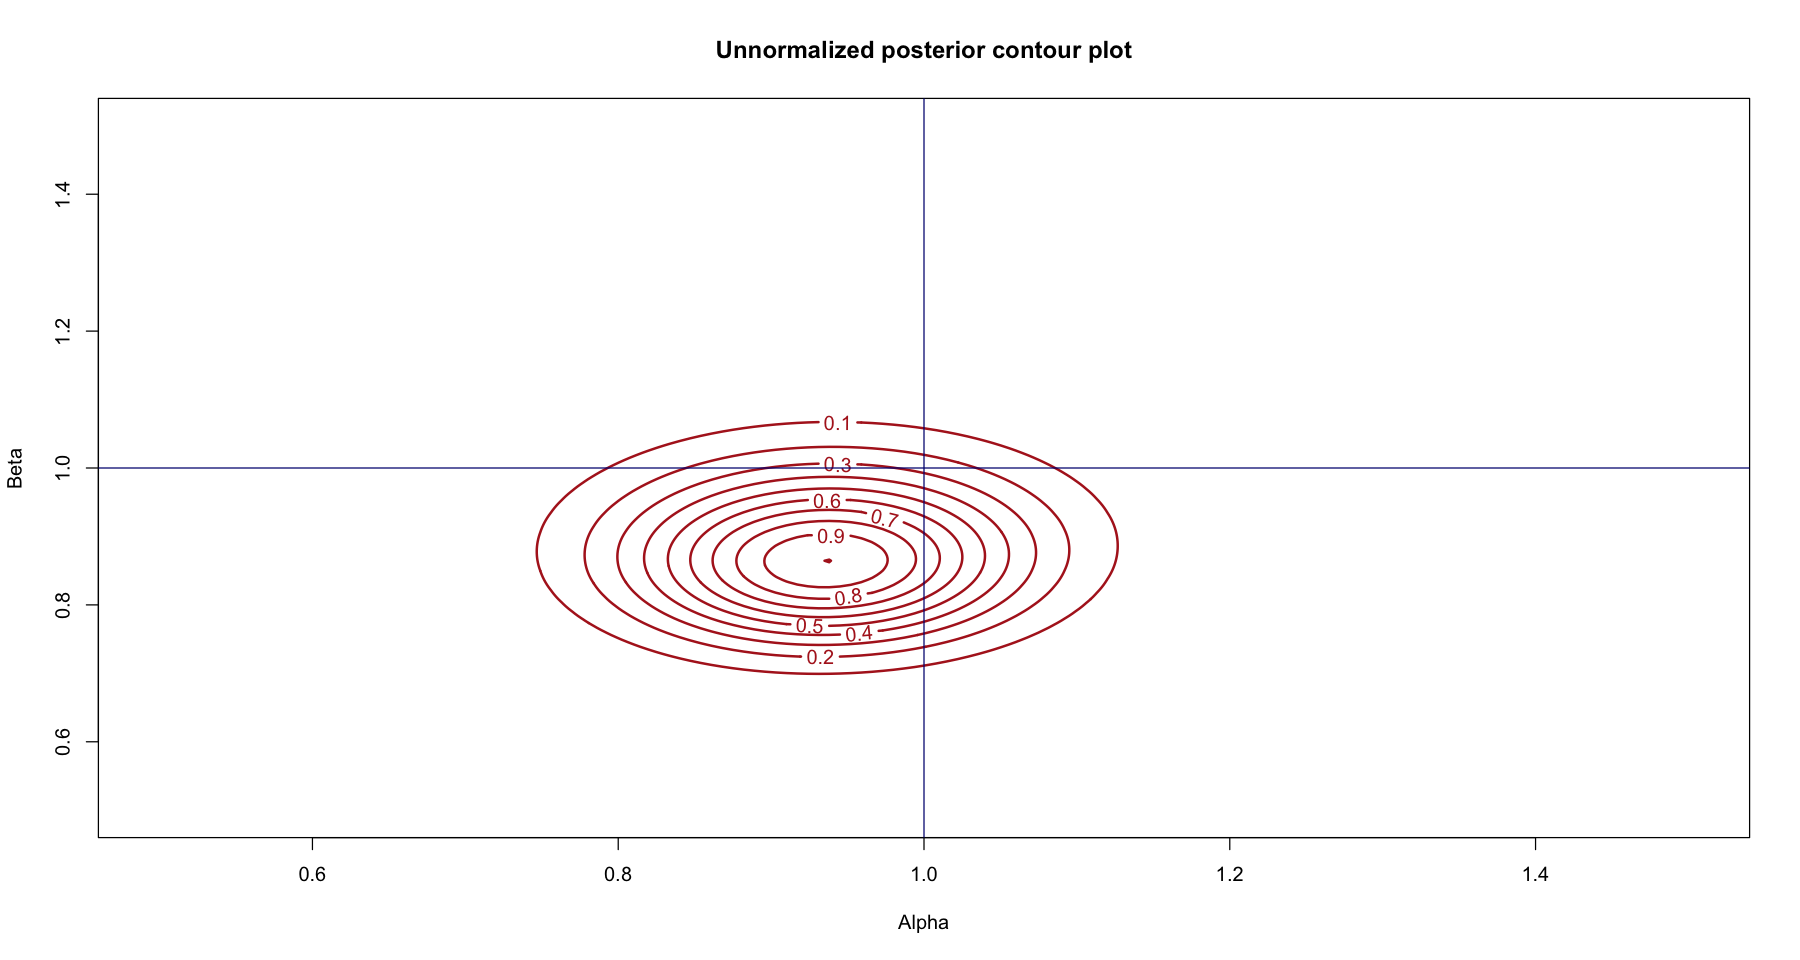

In [28]:
# Plot unnormalized 2D posterior as contours. contour(a, b, exp(z),
plot_contour <- contour(a, b, exp(z),
nlevels = 10,
labcex = 1,
lwd = 2, xlab="Alpha", ylab="Beta",main='Unnormalized posterior contour plot', col='firebrick', xlim=c(0.5,1.5), ylim=c(0.5,1.5))
abline(v=alpha_0,h=beta_0,col="navy")

In [29]:
df <- data.frame(z)

In [30]:
df <- exp(df)

In [31]:
post_a <- apply(df, 1, sum) 
post_b <- apply(df, 2, sum)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


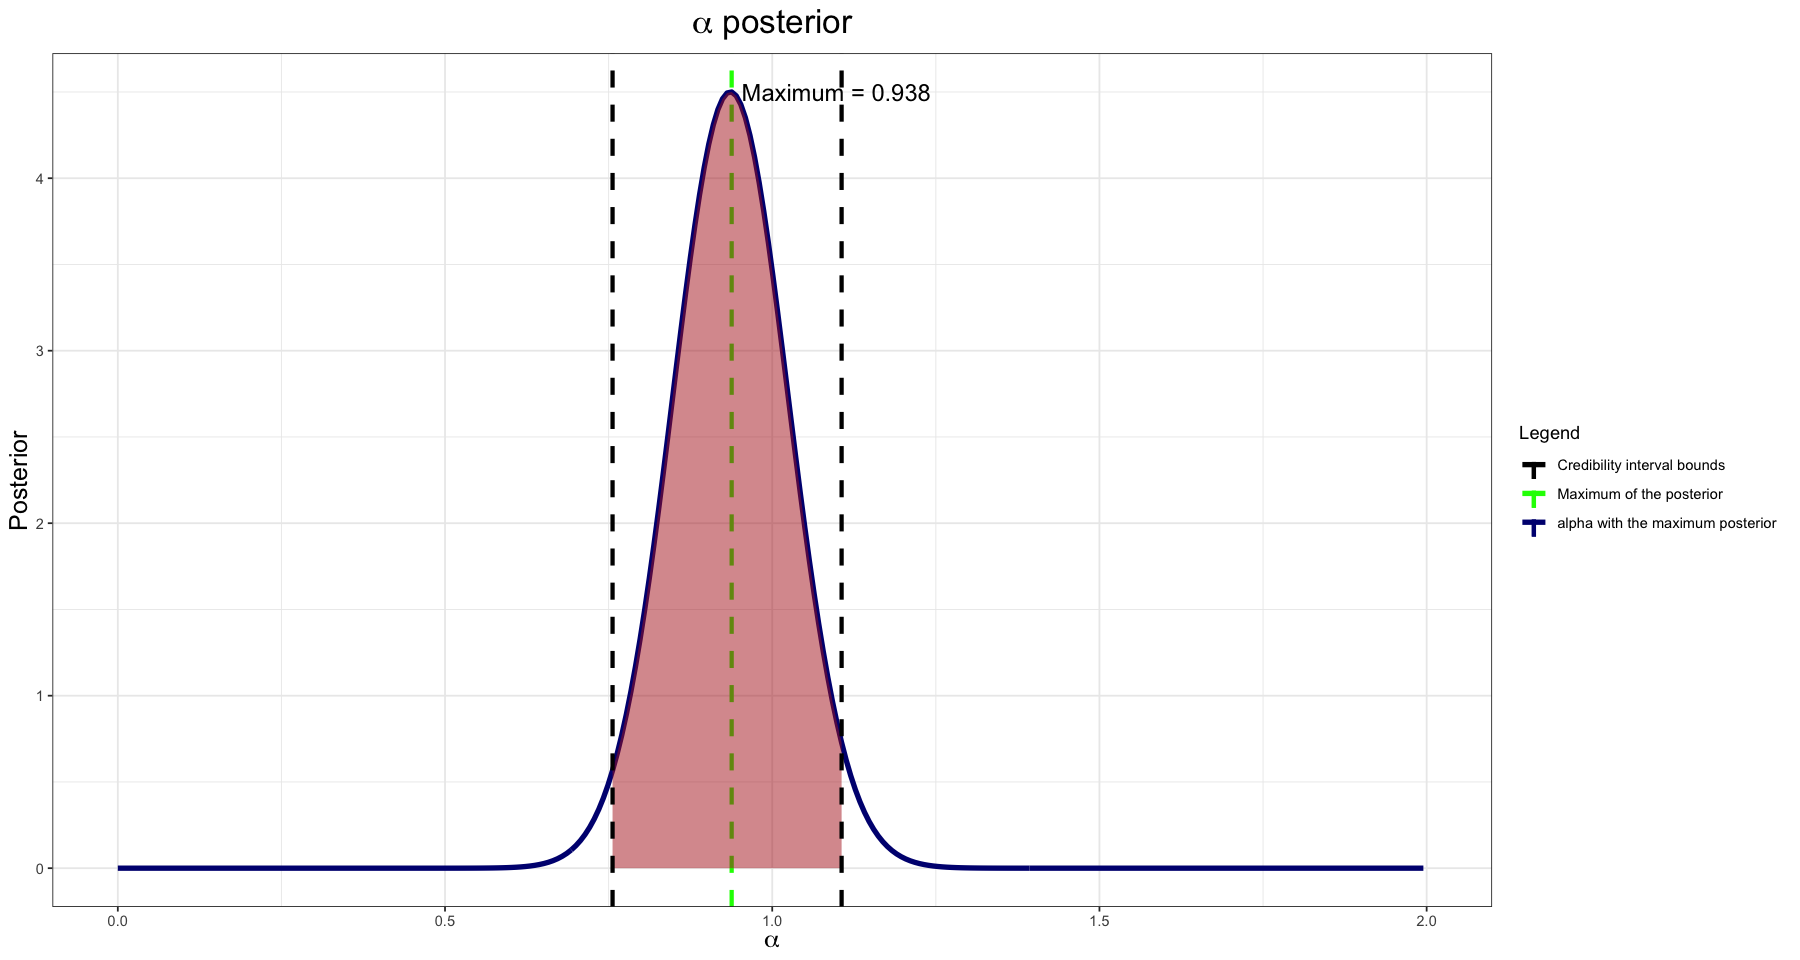

In [32]:
#Normalized beta case
options(repr.plot.width=15, repr.plot.height=8)

y_post_a = post_a/(h*sum(post_a))
max_index=which.max(y_post_a)
cumul <- cumsum(y_post_a*((x_max-x_min)/n_sample))
lower_bound <- a[length(cumul[cumul < 0.025])]
upper_bound <- a[length(cumul[cumul < 0.975])]
y_ribbon <- y_post_a[length(cumul[cumul < 0.025]):length(cumul[cumul < 0.975])]



plot <- ggplot() +
        scale_x_continuous(breaks=0:5, labels=0:5) +
        theme_bw() +
        geom_line(aes(x=a, y=y_post_a, color='alpha with the maximum posterior'), lwd=1.5) +
        geom_vline(aes(xintercept=a[max_index], color='Maximum of the posterior'), linetype='dashed', lwd=1.2) +
        labs(title=TeX('$\\alpha$ posterior'), x= TeX('$\\alpha$'), y='Posterior', color='Legend') +
        theme(plot.title = element_text(size=20, hjust=0.5))  +
        theme(axis.title = element_text(size=15)) +
        scale_color_manual(values = c('Maximum of the posterior' = 'green', 'alpha with the maximum posterior' ='navy', 'Credibility interval bounds'='black')) +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, length.out=length(y_ribbon)), ymin=0, ymax=y_ribbon), fill='firebrick', alpha=0.5) +
        geom_vline(aes(xintercept=lower_bound,  color='Credibility interval bounds'), linetype='dashed', lwd=1.2) +
        geom_vline(aes(xintercept=upper_bound), linetype='dashed', lwd=1.2, color='black') +
        annotate('text', x=a[max_index]+0.16, y=4.5 , label=sprintf("Maximum = %s", a[max_index]), size=5) +
        xlim(0,2)


plot        

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


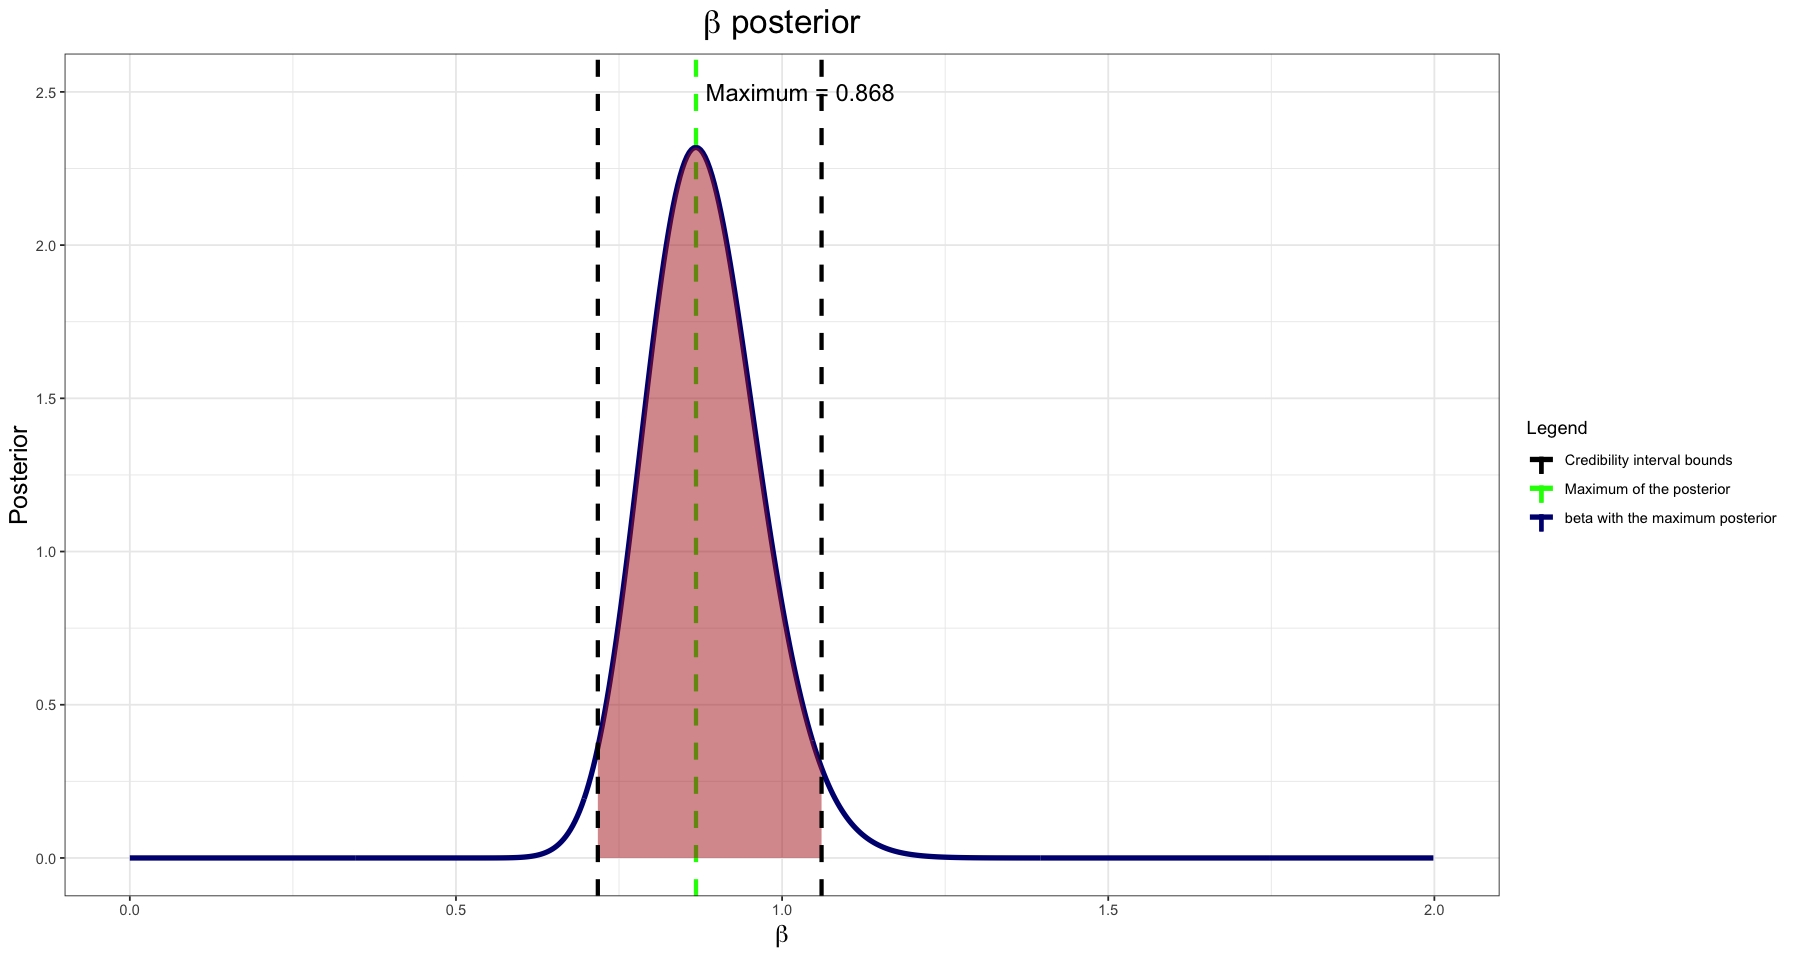

In [33]:
#Normalized beta case
options(repr.plot.width=15, repr.plot.height=8)

y_post_b = post_b/(h*sum(post_b))
max_index=which.max(y_post_b)
cumul <- cumsum(y_post_b*((x_max-x_min)/n_sample))
lower_bound <- b[length(cumul[cumul < 0.025])]
upper_bound <- b[length(cumul[cumul < 0.975])]
y_ribbon <- y_post_b[length(cumul[cumul < 0.025]):length(cumul[cumul < 0.975])]



plot <- ggplot() +
        scale_x_continuous(breaks=0:5, labels=0:5) +
        theme_bw() +
        geom_line(aes(x=b, y=y_post_b, color='beta with the maximum posterior'), lwd=1.5) +
        geom_vline(aes(xintercept=b[max_index], color='Maximum of the posterior'), linetype='dashed', lwd=1.2) +
        labs(title=TeX('$\\beta$ posterior'), x= TeX('$\\beta$'), y='Posterior', color='Legend') +
        theme(plot.title = element_text(size=20, hjust=0.5))  +
        theme(axis.title = element_text(size=15)) +
        scale_color_manual(values = c('Maximum of the posterior' = 'green', 'beta with the maximum posterior' ='navy', 'Credibility interval bounds'='black')) +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, length.out=length(y_ribbon)), ymin=0, ymax=y_ribbon), fill='firebrick', alpha=0.5) +
        geom_vline(aes(xintercept=lower_bound,  color='Credibility interval bounds'), linetype='dashed', lwd=1.2) +
        geom_vline(aes(xintercept=upper_bound), linetype='dashed', lwd=1.2, color='black') +
        annotate('text', x=b[max_index]+0.16, y=2.5 , label=sprintf("Maximum = %s", b[max_index]), size=5) +
        xlim(0,2)


plot        

# Exercise 3

## Point 1

### In this first part of the analysis we replicate the example done in the lesson, in the second we define the function for the comparison

In [34]:
# - Generative model
signal <- function(x, a, b, x0, w, t) {
         t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}


# Define model parameters
x0 <- 0
w <-1 
A_true <- 2 
B_true <- 1 
Delta_t <- 5



set.seed(123)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
ddat <- rpois(length(s_true), s_true)

xdat_off = xdat-0.25
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
splot <- signal(xplot, A_true, B_true, x0, w, Delta_t) 

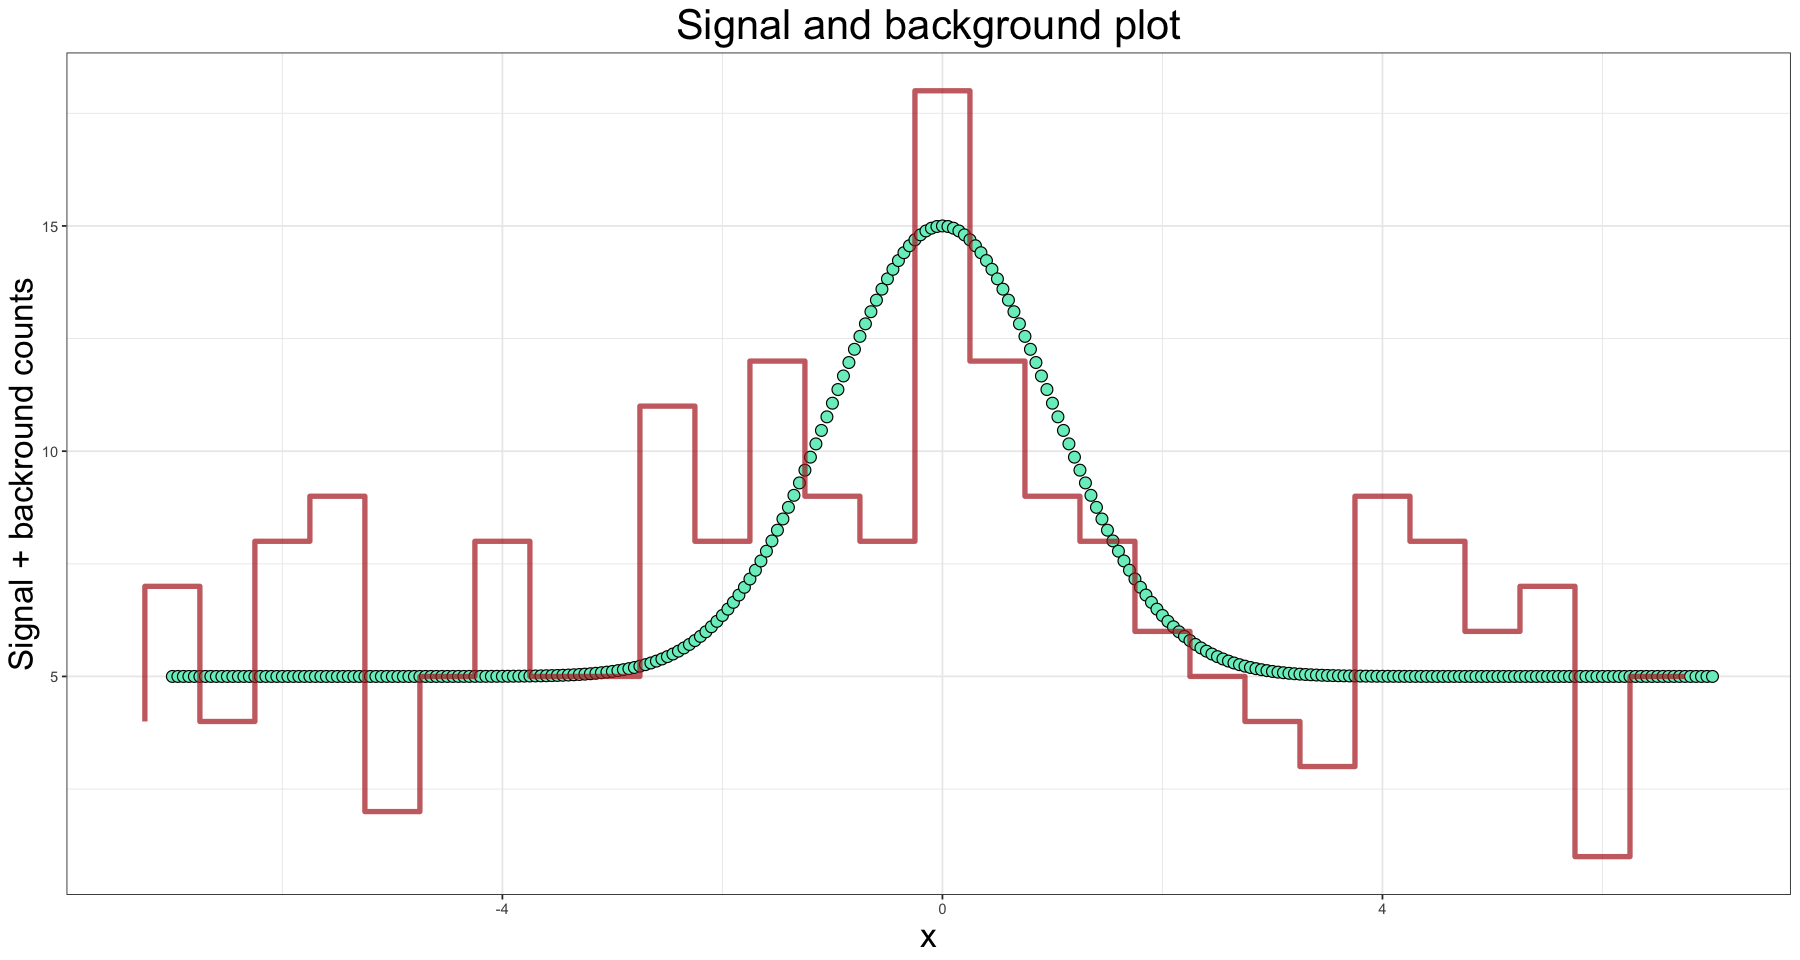

In [35]:
plot <- ggplot() +
        theme_bw() + 
        geom_point(aes(x = xplot, y = splot), size=3, fill='aquamarine2', color='black', pch=21) +
        geom_step(aes(x= xdat_off, y=ddat), direction = 'vh', lwd=1.5, color='firebrick', alpha=0.7) +
        labs(title='Signal and background plot', y='Signal + backround counts', x='x') +
        theme(plot.title = element_text(size=25, hjust =0.5)) +
        theme(axis.title = element_text(size=20, hjust =0.5)) 
        
        



plot

In [36]:
# - Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid 
b <- blim[1] + diff(blim)*uniGrid

In [37]:
# Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
            if(a<0 || b <0) {
                return(-Inf)
            } # the effect of the prior sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
        sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

In [38]:
z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
        z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
}
z <- z - max(z) # set maximum to zero





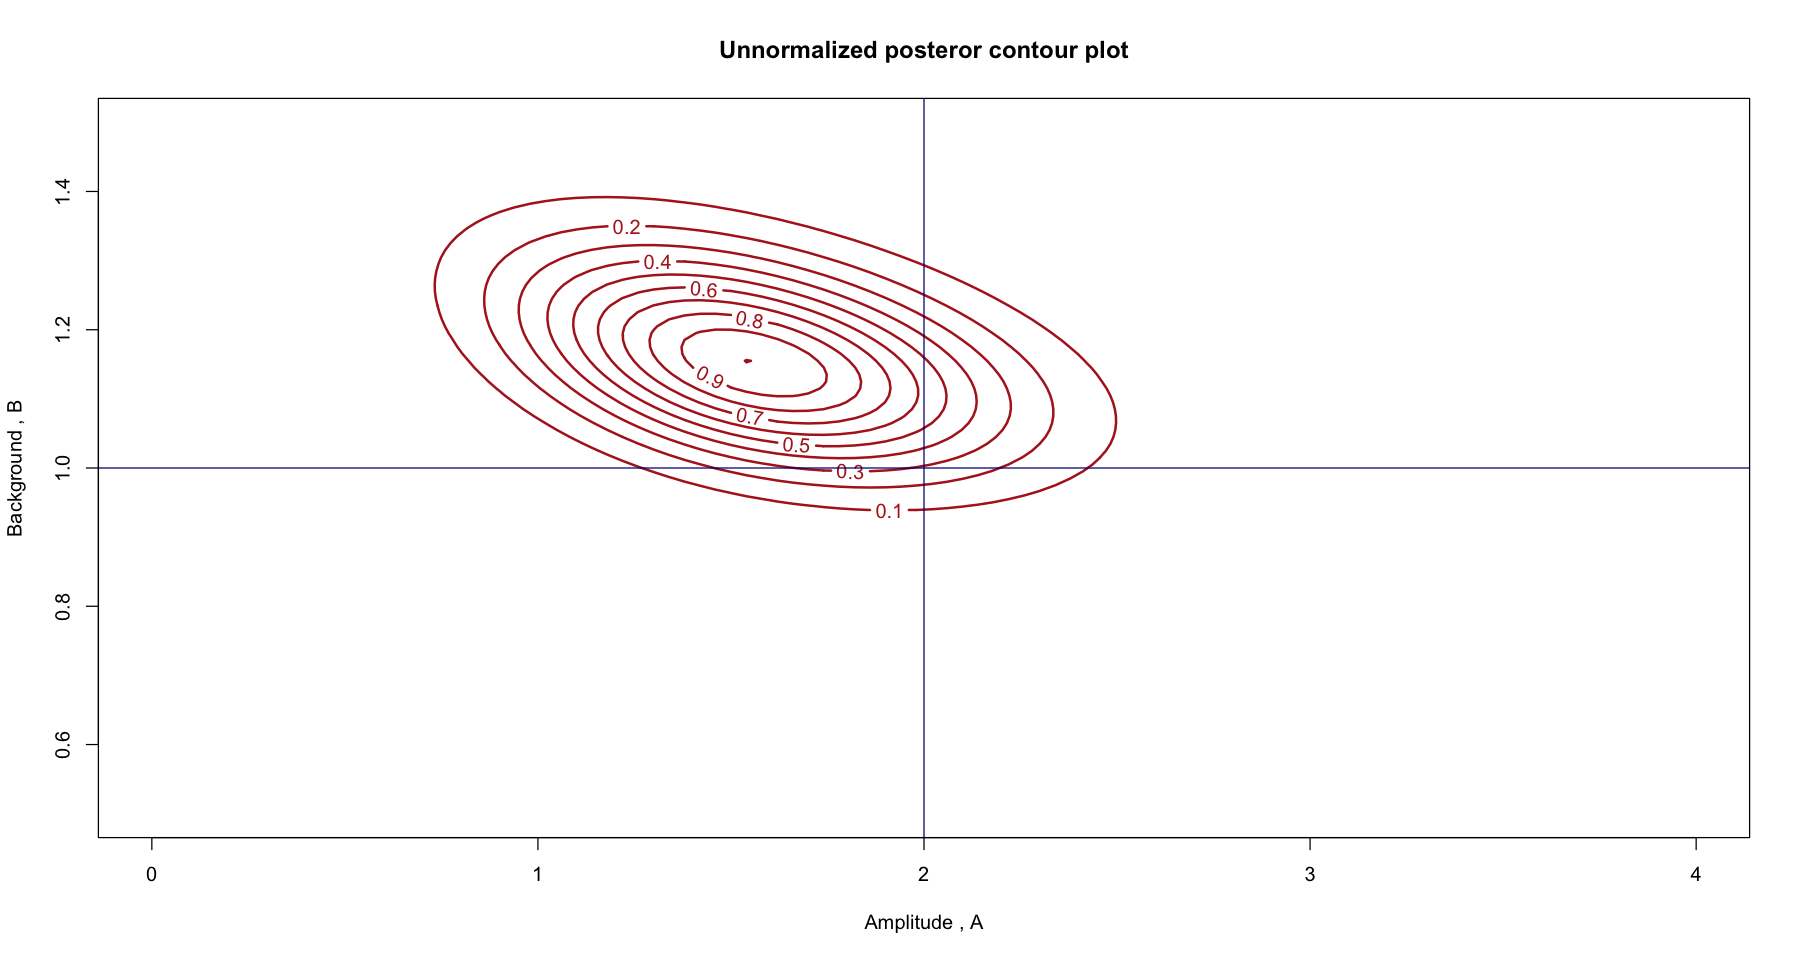

In [39]:
# Plot unnormalized 2D posterior as contours. contour(a, b, exp(z),
plot_contour <- contour(a, b, exp(z),
nlevels = 10,
labcex = 1,
lwd = 2, xlab="Amplitude , A", ylab="Background , B",main='Unnormalized posteror contour plot', col='firebrick')
abline(v=A_true,h=B_true,col="navy")

In [40]:
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/(delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum) 
p_b_D <- p_b_D/(delta_b*sum(p_b_D))


p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B_true,x0, w, Delta_t))
p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A_true, b,x0, w, Delta_t))
p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))


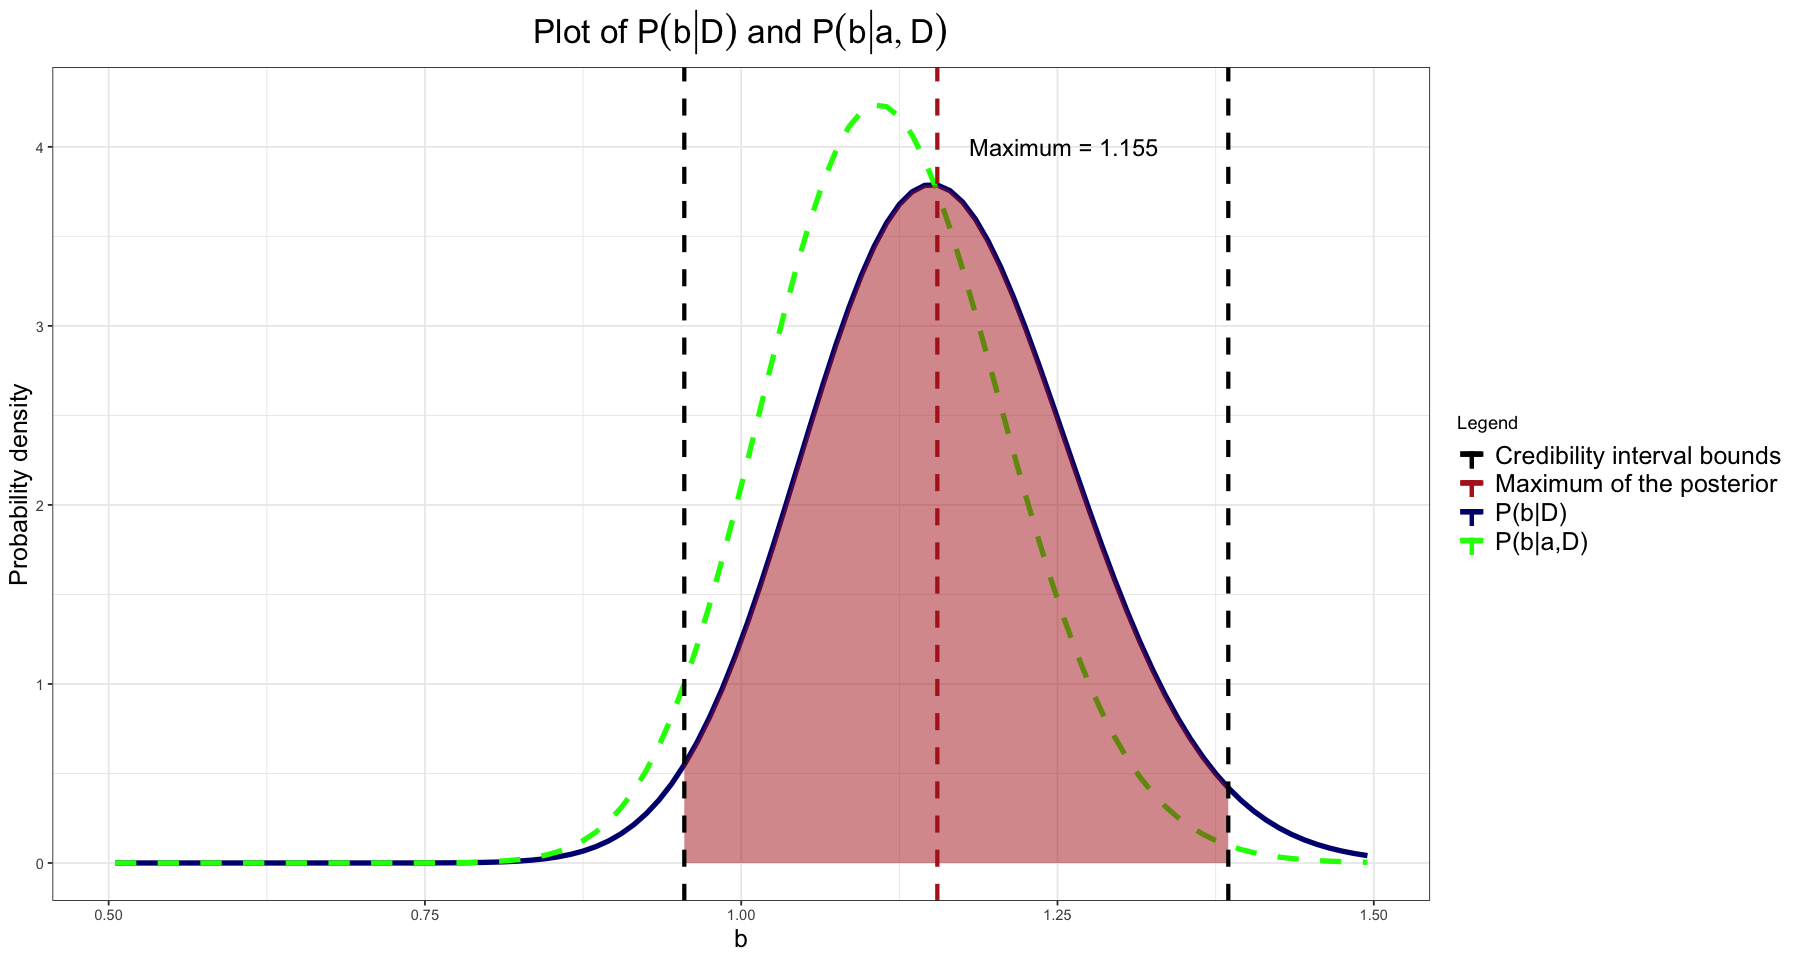

In [41]:
#computation of the credibility intervals
cumul <- cumsum(p_b_D*((max(b)-min(b))/length(b)))
lower_bound <- b[length(cumul[cumul < 0.025])]
upper_bound <- b[length(cumul[cumul < 0.975])]
y_ribbon <- p_b_D[length(cumul[cumul < 0.025]):length(cumul[cumul < 0.975])]
max_index=which.max(p_b_D)

plot_b <- ggplot() +
    theme_bw() +
    geom_line(aes(x = b,y =  p_b_D, color='P(b|D)'), lwd=1.5) + 
    geom_line(aes(x = b,y =  p_b_aD, color='P(b|a,D)'), linetype='dashed', lwd=1.5) +
    labs(title=TeX('Plot of $P(b|D)$ and $P(b|a,D)$'), x='b', y='Probability density', color='Legend') +
    geom_ribbon(aes(x = seq(lower_bound, upper_bound, length.out=length(y_ribbon)), ymin=0, ymax=y_ribbon), fill='firebrick', alpha=0.5) +
    geom_vline(aes(xintercept=lower_bound,  color='Credibility interval bounds'), linetype='dashed', lwd=1.2) +
    geom_vline(aes(xintercept=upper_bound), linetype='dashed', lwd=1.2, color='black') +
    scale_color_manual(values = c('Credibility interval bounds'='black', 'P(b|D)'='navy', 'P(b|a,D)'='green', 'Maximum of the posterior'='firebrick')) +
    theme(plot.title = element_text(size=20, hjust=0.5)) +
    theme(legend.text=element_text(size=15)) +
    geom_vline(aes(xintercept=b[max_index], color='Maximum of the posterior'), linetype='dashed', lwd=1.2) +
    annotate('text', x=b[max_index]+0.1, y=4 , label=sprintf("Maximum = %s", b[max_index]), size=5) +
    theme(axis.title = element_text(size=15))

plot_b

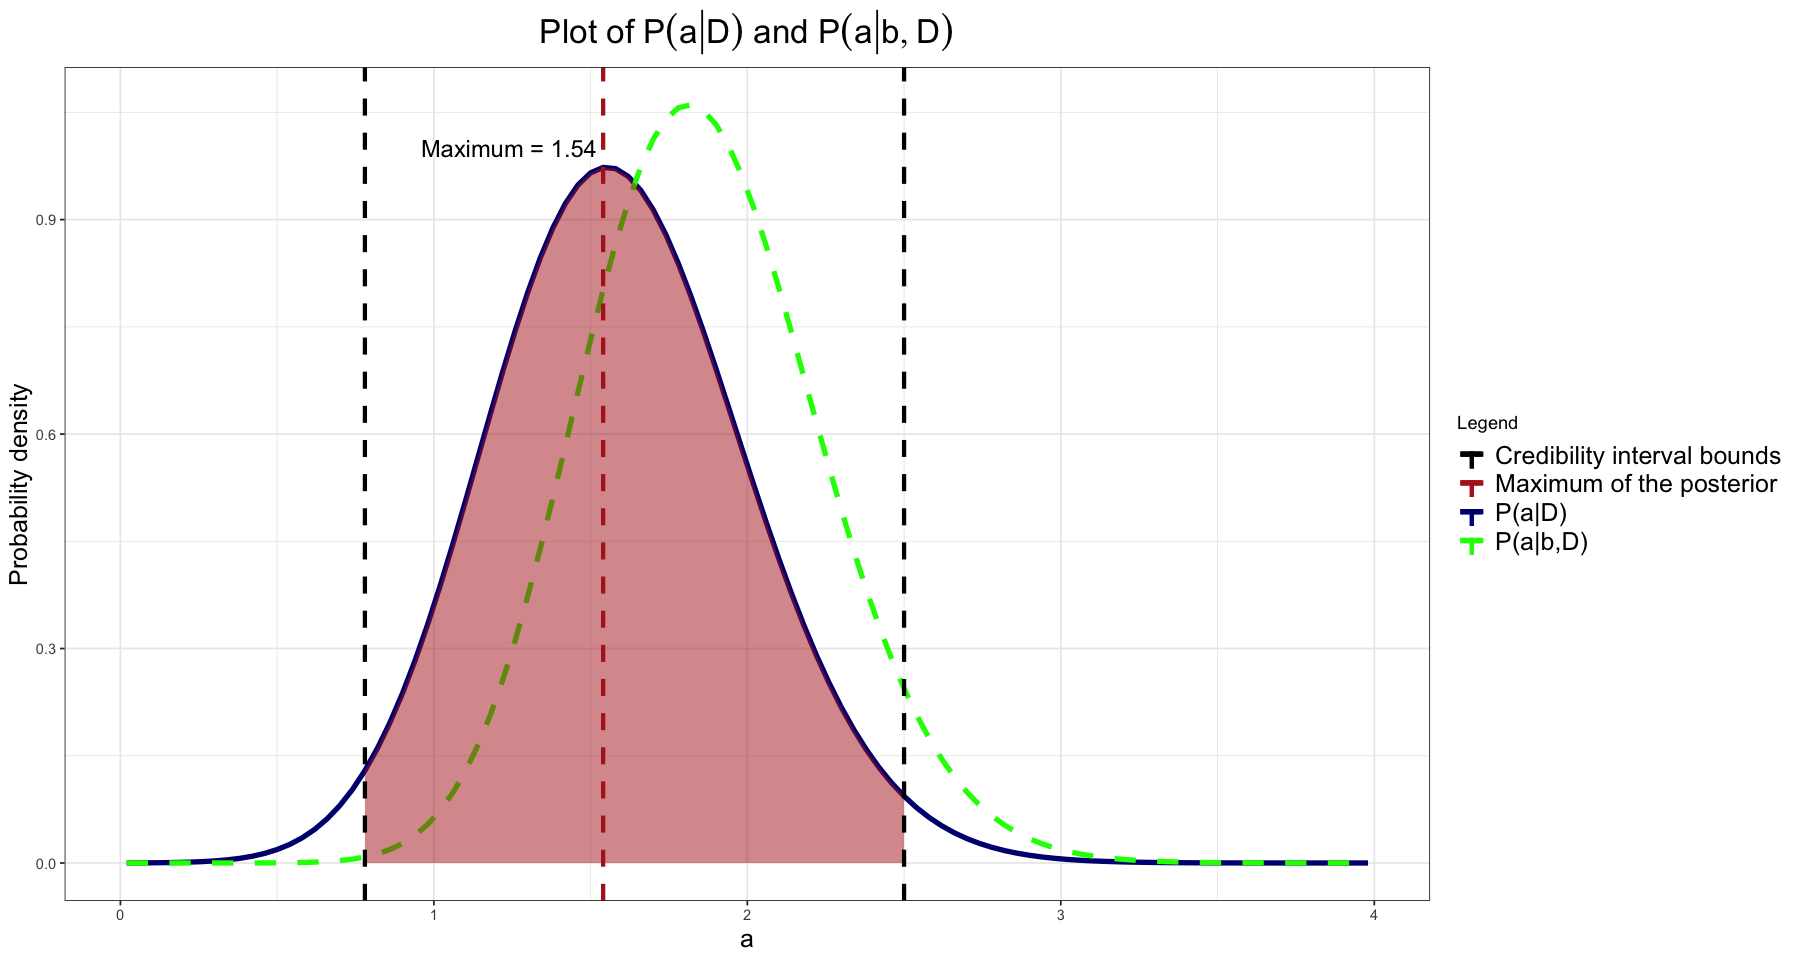

In [42]:
#computation of the credibility intervals
cumul_ <- cumsum(p_a_D*((max(a)-min(a))/length(a)))
lower_bound_ <- a[length(cumul_[cumul_ < 0.025])]
upper_bound_ <- a[length(cumul_[cumul_ < 0.975])]
y_ribbon_ <- p_a_D[length(cumul_[cumul_ < 0.025]):length(cumul_[cumul_ < 0.975])]

max_index=which.max(p_a_D)

plot_a <- ggplot() +
    theme_bw() +
    geom_line(aes(x = a,y =  p_a_D, color='P(a|D)'), lwd=1.5) + 
    geom_line(aes(x = a,y =  p_a_bD, color='P(a|b,D)'), linetype='dashed', lwd=1.5) +
    labs(title=TeX('Plot of $P(a|D)$ and $P(a|b,D)$'), x='a', y='Probability density', color='Legend') +
    geom_ribbon(aes(x = seq(lower_bound_, upper_bound_, length.out=length(y_ribbon)), ymin=0, ymax=y_ribbon_), fill='firebrick', alpha=0.5) +
    geom_vline(aes(xintercept=lower_bound_,  color='Credibility interval bounds'), linetype='dashed', lwd=1.2) +
    geom_vline(aes(xintercept=upper_bound_), linetype='dashed', lwd=1.2, color='black') +
    scale_color_manual(values = c('Credibility interval bounds'='black', 'P(a|D)'='navy', 'P(a|b,D)'='green', 'Maximum of the posterior'='firebrick')) +
    theme(plot.title = element_text(size=20, hjust=0.5)) +
    theme(legend.text=element_text(size=15)) +
    geom_vline(aes(xintercept=a[max_index], color='Maximum of the posterior'), linetype='dashed', lwd=1.2) +
    annotate('text', x=a[max_index]-0.3, y=1 , label=sprintf("Maximum = %s", a[max_index]), size=5) +
    theme(axis.title = element_text(size=15))
    
plot_a


In [43]:
# Compute mean , standard deviation , covariance , correlation , of A and B
mean_a <- delta_a * sum(a * p_a_D)
mean_b <- delta_b * sum(b * p_b_D)
sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) ) 
sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )


# Covariance nurmalization is performed with ’brute force’
# The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
# This is independent of (a,b) so can be calculated outside of the loops. 
cov_ab <- 0
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
        cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
    }
}

In [44]:
cov_ab <- cov_ab / sum(exp(z)) 
rho_ab <- cov_ab / (sd_a * sd_b)
cat("a = ", mean_a, "+/-", sd_a, "\n") 
cat("b = ", mean_b, "+/-", sd_b, "\n") 
cat("rho = ", rho_ab, "\n")

a =  1.590733 +/- 0.4114023 
b =  1.159114 +/- 0.1048414 
rho =  -0.4192882 


In [45]:
signal_backround <- function(a_, b_, x0_, w_, t_){
    # - Generative model
    signal <- function(x, a, b, x0, w, t) {
            t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
    }


    # Define model parameters
    x0 <- x0_
    w <- w_
    A_true <- a_
    B_true <- b_ 
    Delta_t <- t_



    set.seed(123)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
    ddat <- rpois(length(s_true), s_true)

    xdat_off = xdat-0.25
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A_true, B_true, x0, w, Delta_t) 


    plot <- ggplot() +
        theme_bw() + 
        geom_point(aes(x = xplot, y = splot), size=3, fill='aquamarine2', color='black', pch=21) +
        geom_step(aes(x= xdat_off, y=ddat), direction = 'vh', lwd=1.5, color='firebrick', alpha=0.7) +
        labs(title='Signal and background plot', y='Signal + backround counts', x='x') +
        theme(plot.title = element_text(size=25, hjust =0.5)) +
        theme(axis.title = element_text(size=20, hjust =0.5)) 
        
        # - Sampling grid for computing posterior
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid

    # Log posterior
    log.post <- function(d, x, a, b, x0, w, t) {
                if(a<0 || b <0) {
                    return(-Inf)
                } # the effect of the prior sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
            sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
    }

    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
        } 
    }
    z <- z - max(z) # set maximum to zero



    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))


    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B_true,x0, w, Delta_t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A_true, b,x0, w, Delta_t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))


    #computation of the credibility intervals
    cumul <- cumsum(p_b_D*((max(b)-min(b))/length(b)))
    lower_bound <- b[length(cumul[cumul < 0.025])]
    upper_bound <- b[length(cumul[cumul < 0.975])]
    y_ribbon <- p_b_D[length(cumul[cumul < 0.025]):length(cumul[cumul < 0.975])]

    plot_b <- ggplot() +
        theme_bw() +
        geom_line(aes(x = b,y =  p_b_D), lwd=1.5, color='firebrick') + 
        geom_line(aes(x = b,y =  p_b_aD), linetype='dashed', lwd=1.5, color='green') +
        labs(title=TeX(sprintf('Plot of $P(b|D)$ and $P(b|a,D)$ w = %.2f, a/b = %.3s', w, a_/b_)), x='b', y='Probability density', color='Legend') +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, length.out=length(y_ribbon)), ymin=0, ymax=y_ribbon), fill='firebrick', alpha=0.5) +
        geom_vline(aes(xintercept=lower_bound), linetype='dashed', lwd=1.2,, color='black') +
        geom_vline(aes(xintercept=upper_bound), linetype='dashed', lwd=1.2, color='black') +
        theme(plot.title = element_text(size=15, hjust=0.5)) +
        theme(axis.title = element_text(size=15))

        #computation of the credibility intervals
    cumul_ <- cumsum(p_a_D*((max(a)-min(a))/length(a)))
    lower_bound_ <- a[length(cumul_[cumul_ < 0.025])]
    upper_bound_ <- a[length(cumul_[cumul_ < 0.975])]
    y_ribbon_ <- p_a_D[length(cumul_[cumul_ < 0.025]):length(cumul_[cumul_ < 0.975])]



    plot_a <- ggplot() +
        theme_bw() +
        geom_line(aes(x = a,y =  p_a_D), lwd=1.5, color='firebrick') + 
        geom_line(aes(x = a,y =  p_a_bD), linetype='dashed', lwd=1.5, color='green') +
        labs(title=TeX(sprintf('Plot of $P(a|D)$ and $P(a|b,D)$ w = %.2f, a/b = %.3s', w, a_/b_)), x='a', y='Probability density') +
        geom_ribbon(aes(x = seq(lower_bound_, upper_bound_, length.out=length(y_ribbon_)), ymin=0, ymax=y_ribbon_), fill='firebrick', alpha=0.5) +
        geom_vline(aes(xintercept=lower_bound_), linetype='dashed', lwd=1.2, color='black') +
        geom_vline(aes(xintercept=upper_bound_), linetype='dashed', lwd=1.2, color='black') +
        theme(plot.title = element_text(size=15, hjust=0.5)) +
        theme(legend.text=element_text(size=4)) +
        theme(axis.title = element_text(size=15))
        
    
        # Compute mean , standard deviation , covariance , correlation , of A and B
    mean_a <- delta_a * sum(a * p_a_D)
    mean_b <- delta_b * sum(b * p_b_D)
    sd_a <- sqrt( delta_a * sum((a-mean_a)^2 * p_a_D) ) 
    sd_b <- sqrt( delta_b * sum((b-mean_b)^2 * p_b_D) )


    # Covariance nurmalization is performed with ’brute force’
    # The normalization constant is Z = delta_a*delta_b*sum(exp(z)).
    # This is independent of (a,b) so can be calculated outside of the loops. 
    cov_ab <- 0
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            cov_ab <- cov_ab + (a[j]-mean_a)*(b[k]-mean_b)*exp(z[j,k])
        }
    }
    cov_ab <- cov_ab / sum(exp(z)) 
    rho_ab <- cov_ab / (sd_a * sd_b)

    return(list(plot, plot_a, plot_b, c(mean_a, sd_a), c(mean_b, sd_b), rho_ab))
    #return(plot)
}

### Checking the different results for different values of w and then for different values of the fraction a/b

In [46]:
results_01 = signal_backround(2, 1, 0, 0.1, 5)
results_025 = signal_backround(2, 1, 0, 0.25, 5)
results_1 = signal_backround(2, 1, 0, 1, 5)
results_2 = signal_backround(2, 1, 0, 2, 5)
results_3 = signal_backround(2, 1, 0, 3, 5)

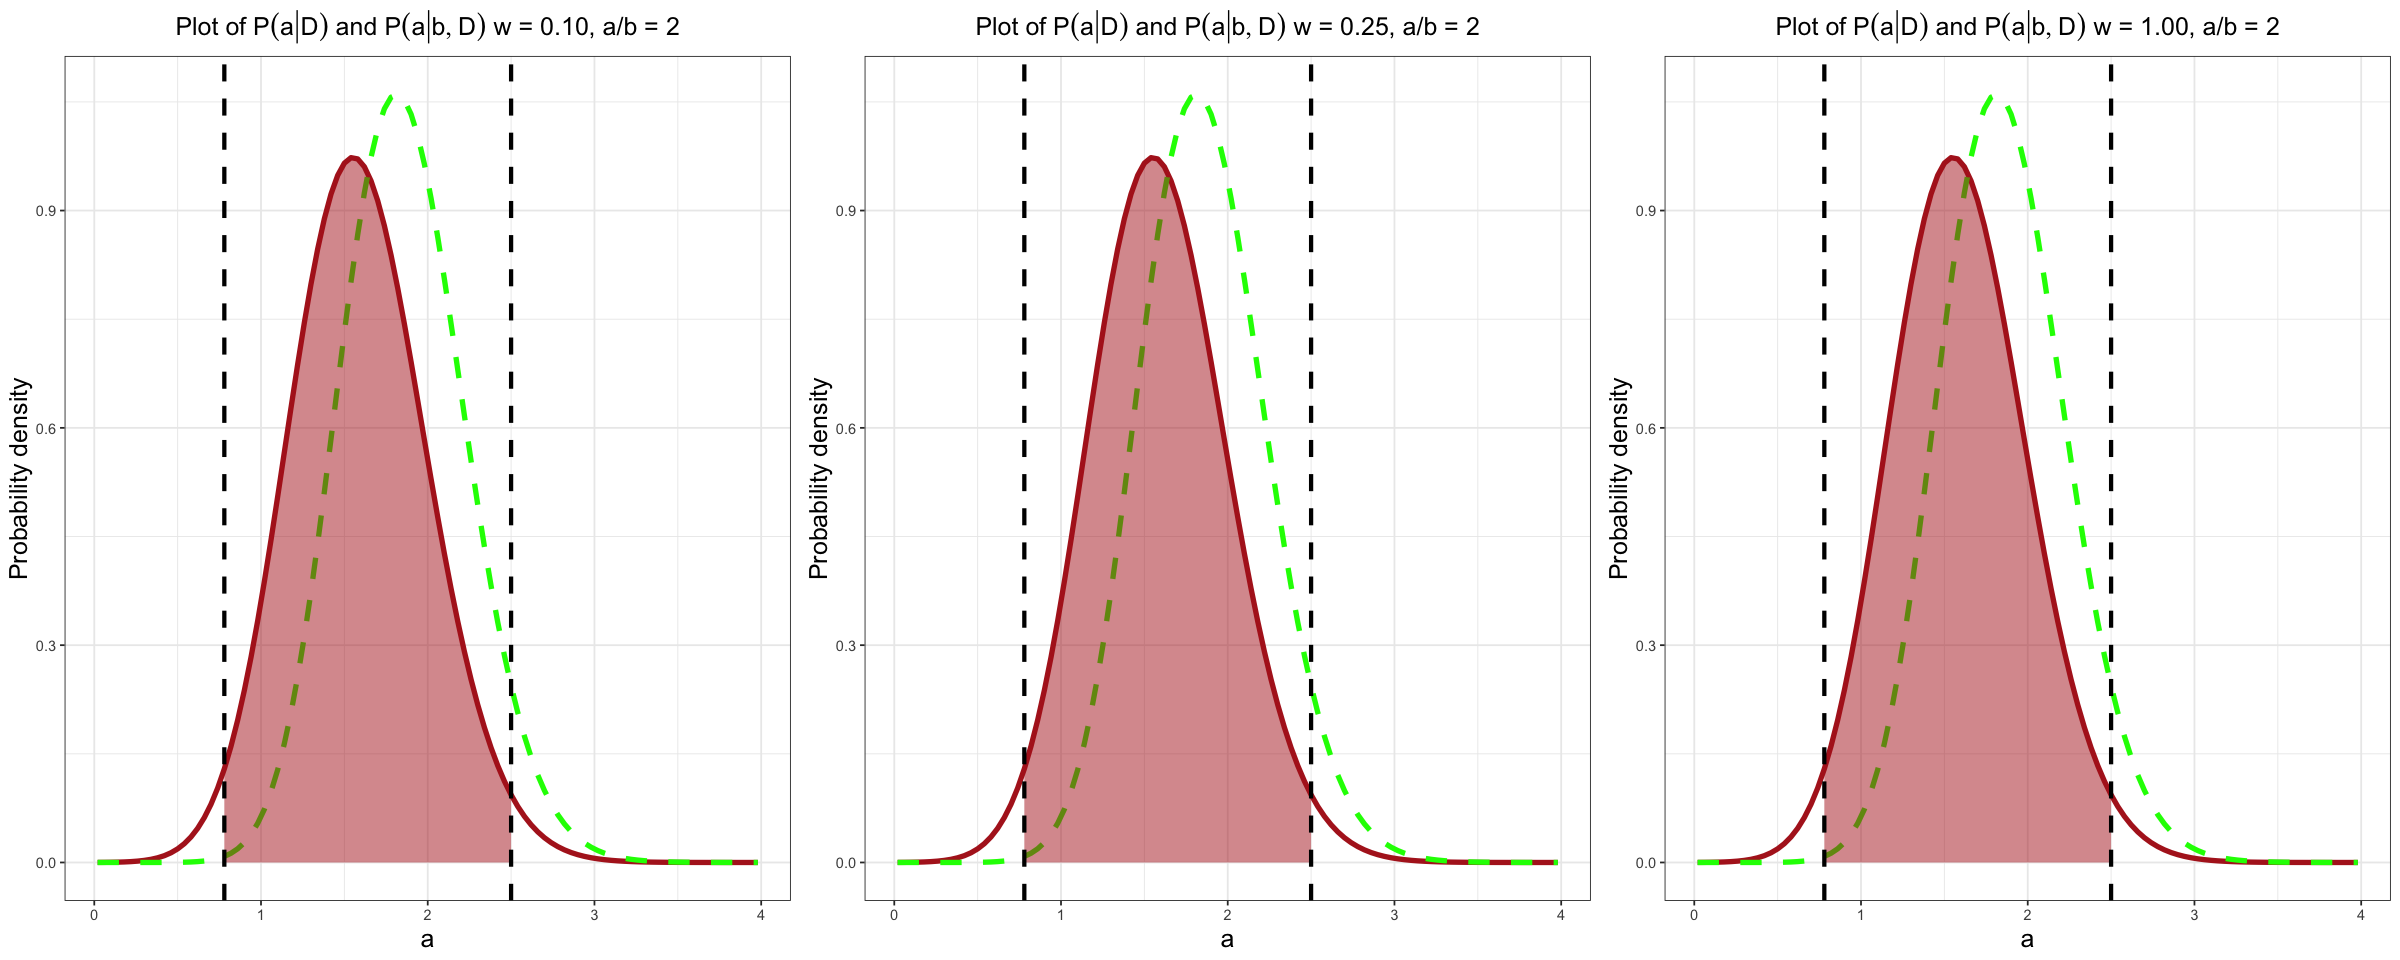

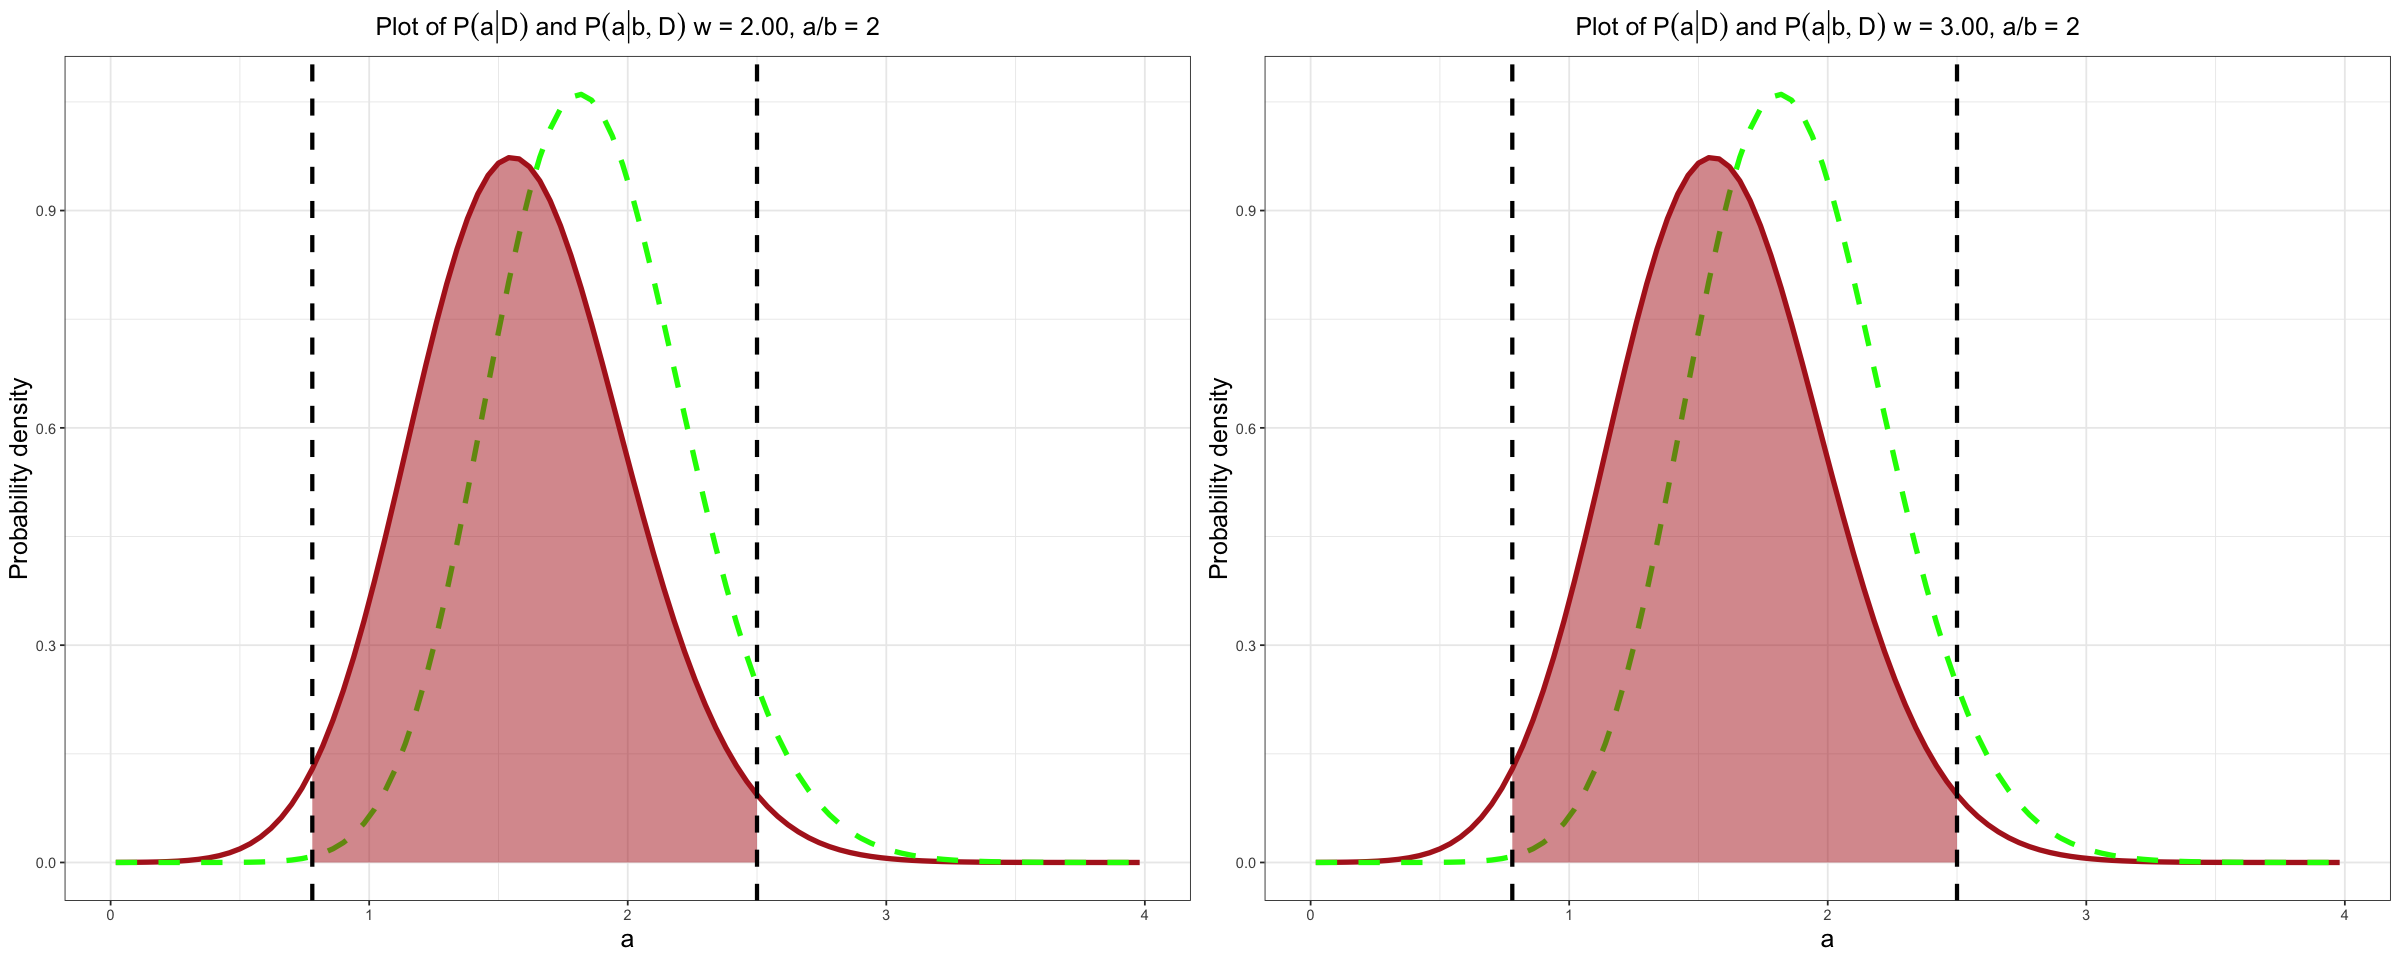

In [47]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(results_01[[2]], results_025[[2]],results_1[[2]], nrow=1)
grid.arrange(results_2[[2]], results_3[[2]], nrow=1)

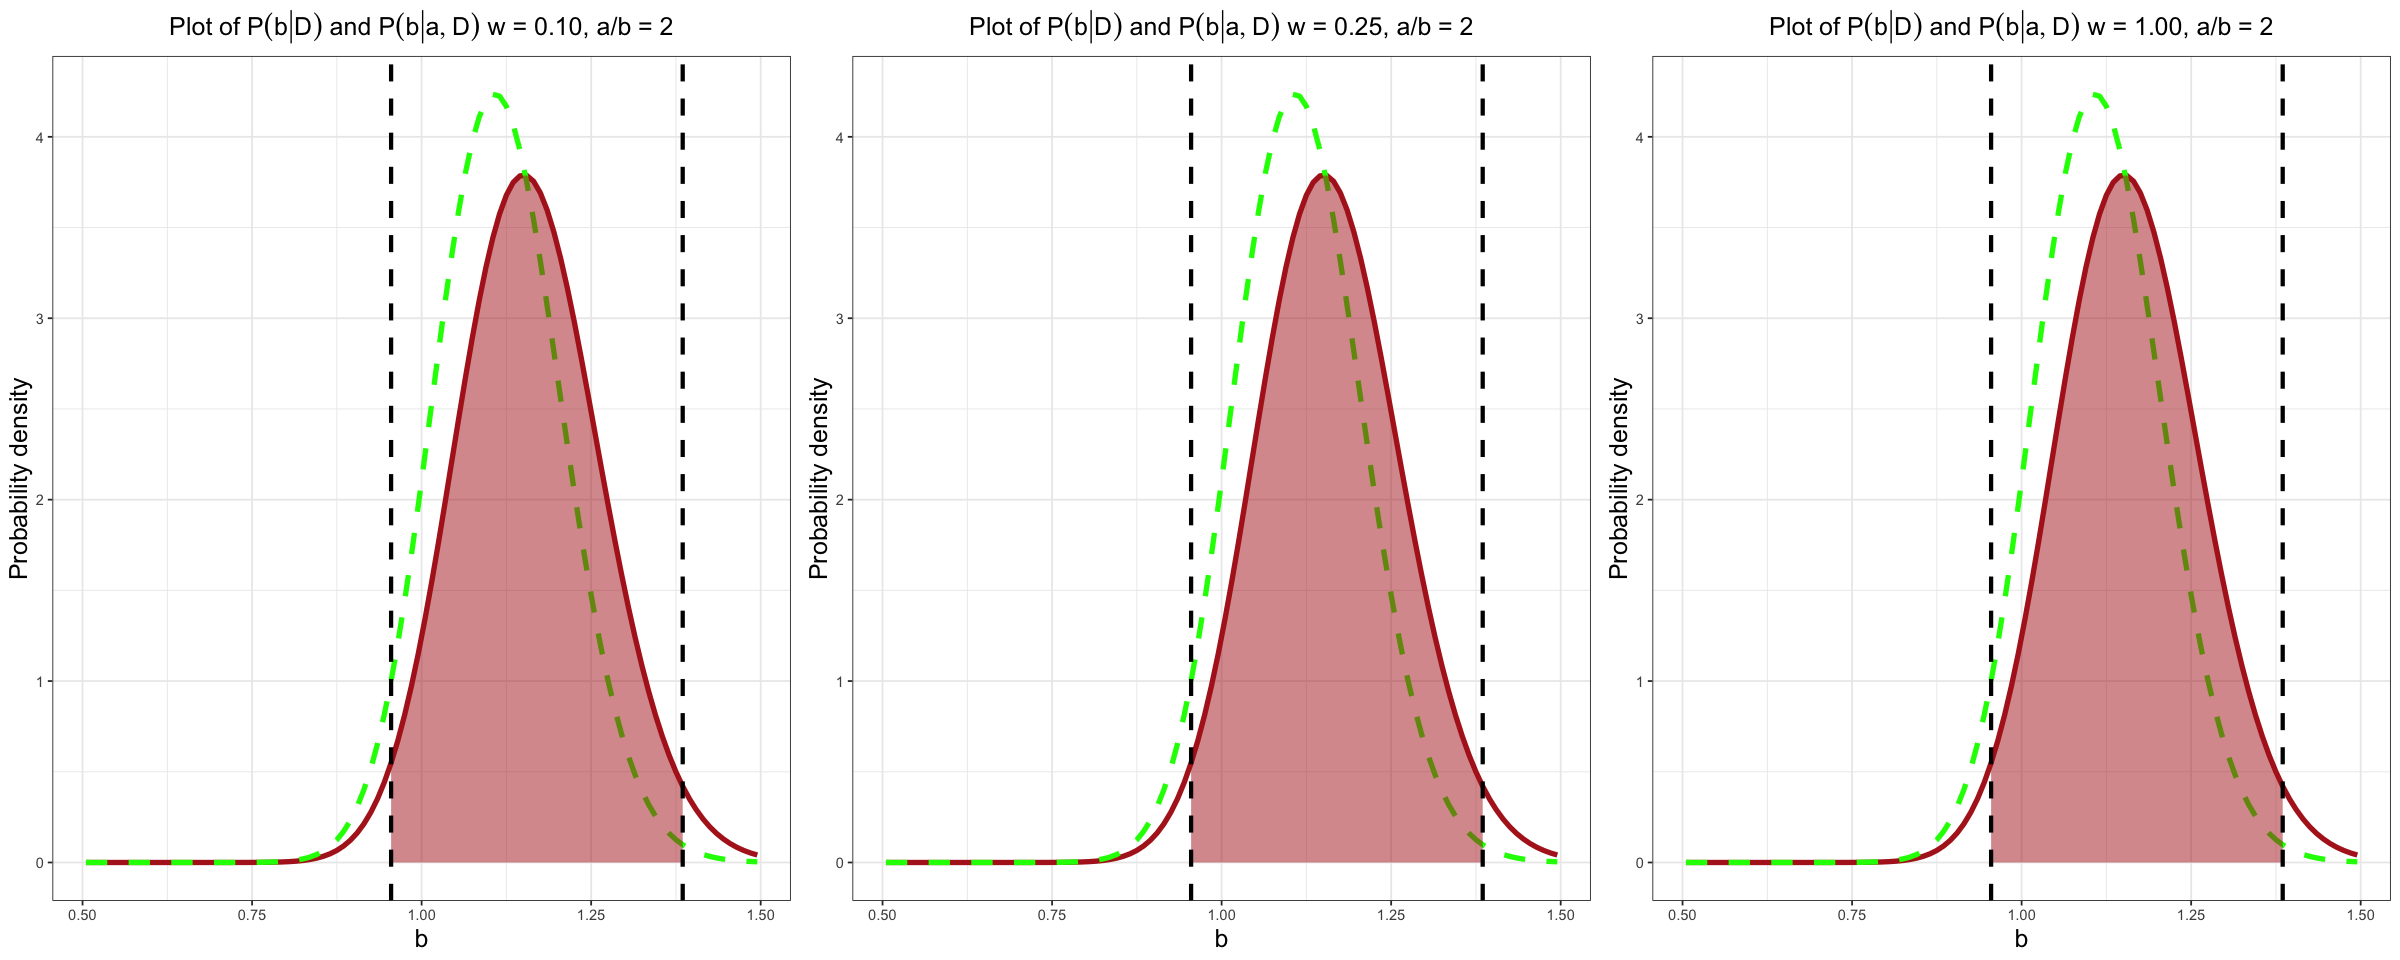

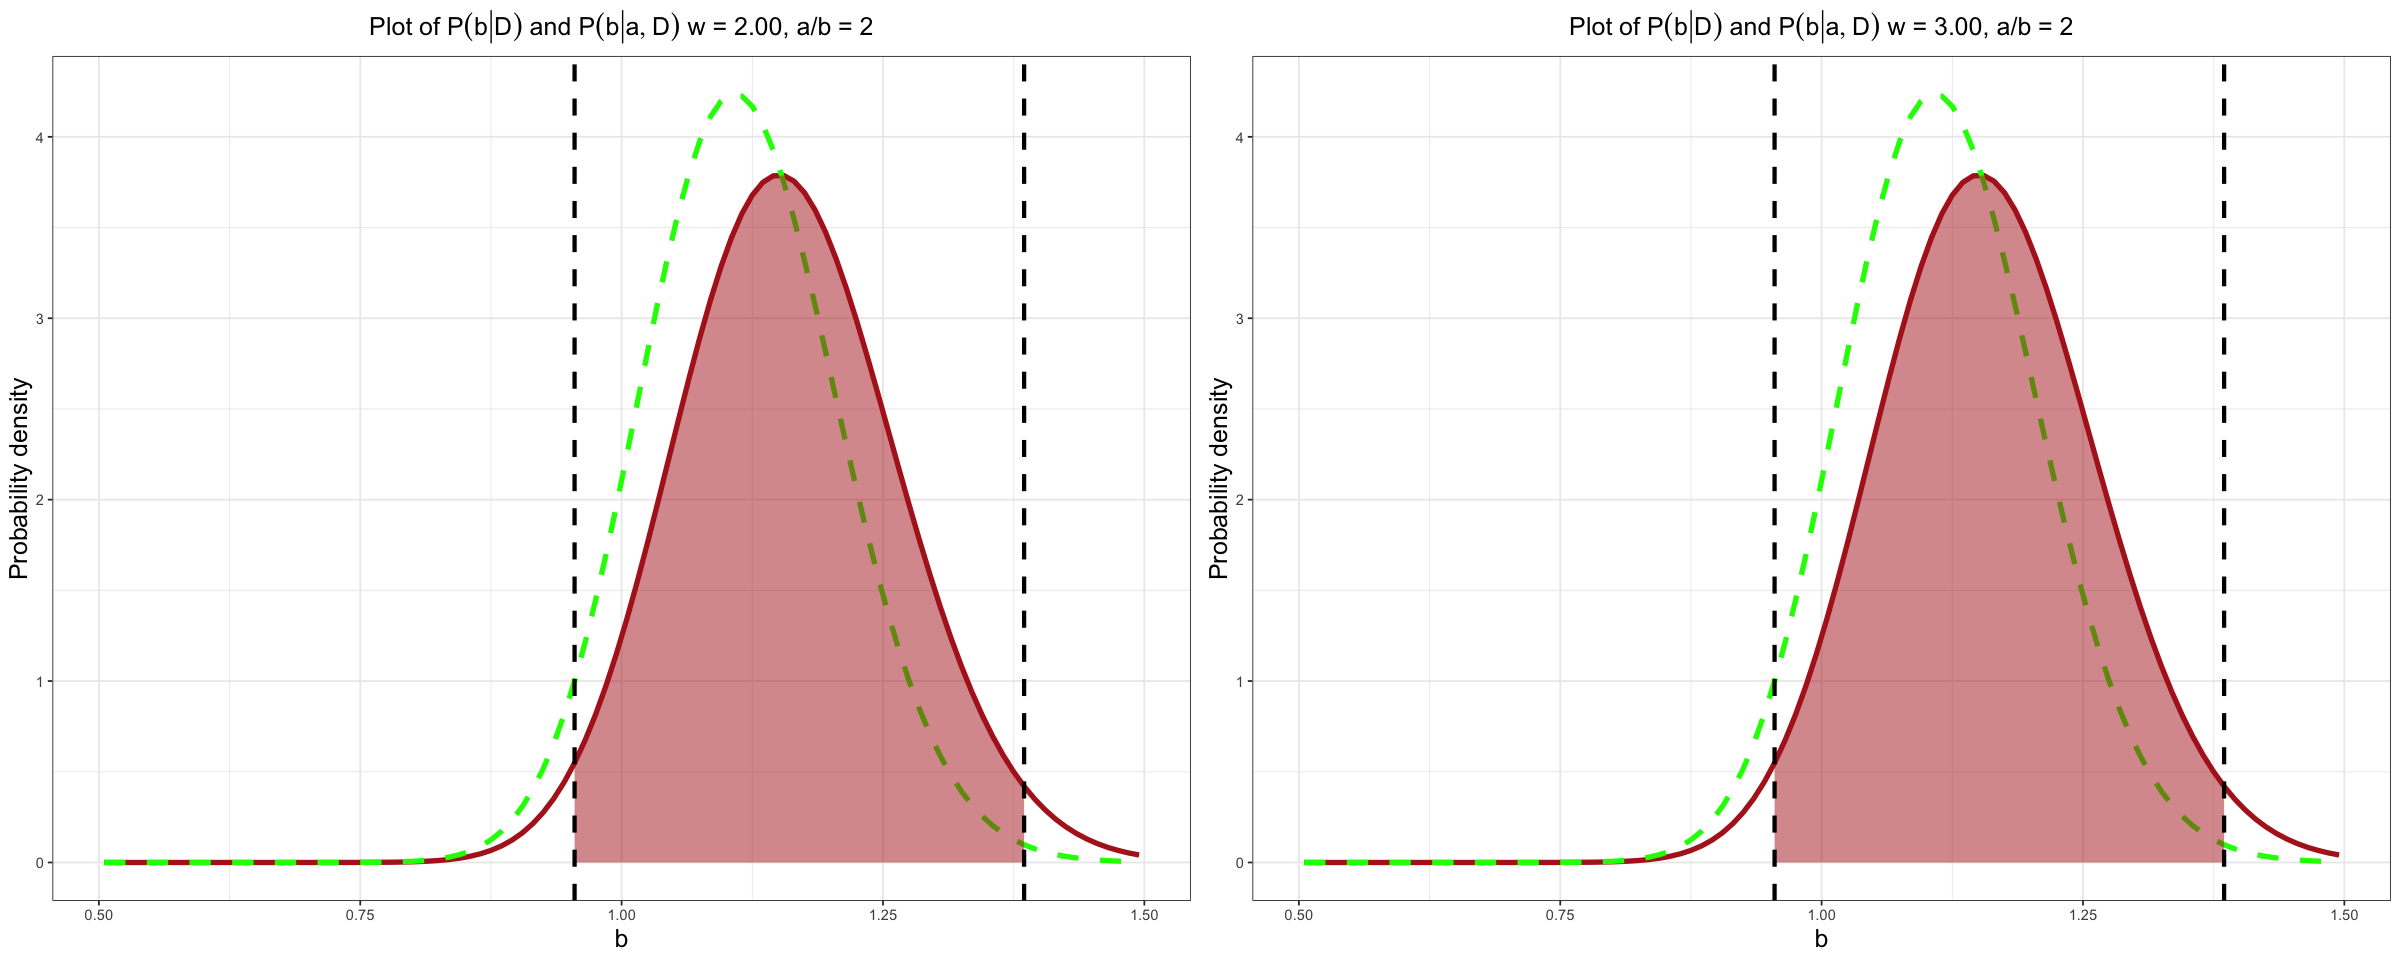

In [48]:
options(repr.plot.width=20, repr.plot.height=8)
grid.arrange(results_01[[3]], results_025[[3]],results_1[[3]], nrow=1)
grid.arrange(results_2[[3]], results_3[[3]], nrow=1)

In [49]:
ret <- list(results_01, results_025, results_1, results_2, results_3)
w <- c(0.1, 0.25, 1, 2, 3)
a_b <- rep(2, 5)

for (i in 1:5){
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have a = ", w[i], a_b[i]), ret[[i]][[4]][1], "+/-", ret[[i]][[4]][2], "\n") 
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have b = ", w[i], a_b[i]), ret[[i]][[5]][1], "+/-", ret[[i]][[5]][2], "\n") 
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have rho = ", w[i], a_b[i]), ret[[i]][[6]], "\n\n")
}

with w = 0.10 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 0.10 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 0.10 and a_true/b_true = 2 we have rho =  -0.4192882 

with w = 0.25 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 0.25 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 0.25 and a_true/b_true = 2 we have rho =  -0.4192882 

with w = 1.00 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 1.00 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 1.00 and a_true/b_true = 2 we have rho =  -0.4192882 

with w = 2.00 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 2.00 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 2.00 and a_true/b_true = 2 we have rho =  -0.4192882 

with w = 3.00 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 3.00 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 3.00 

In [50]:
results_1.5 = signal_backround(1.5, 1, 0, 1, 5)
results_2 = signal_backround(2, 1, 0, 1, 5)
results_2.5 = signal_backround(2.5, 1, 0, 1, 5)
results_3 = signal_backround(3, 1, 0, 1, 5)


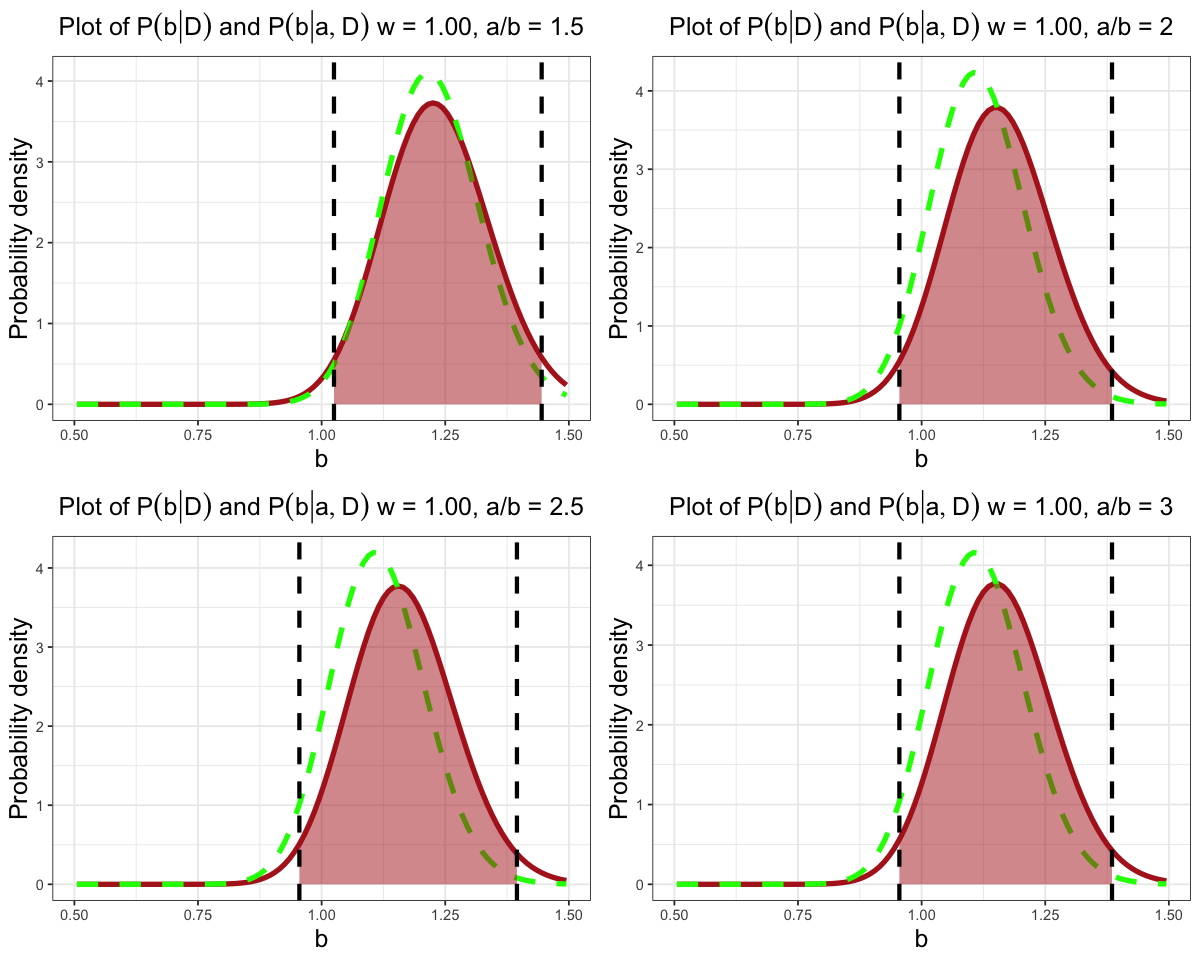

In [51]:
options(repr.plot.width=10, repr.plot.height=8)
grid.arrange(results_1.5[[3]], results_2[[3]],results_2.5[[3]], results_3[[3]], nrow=2)

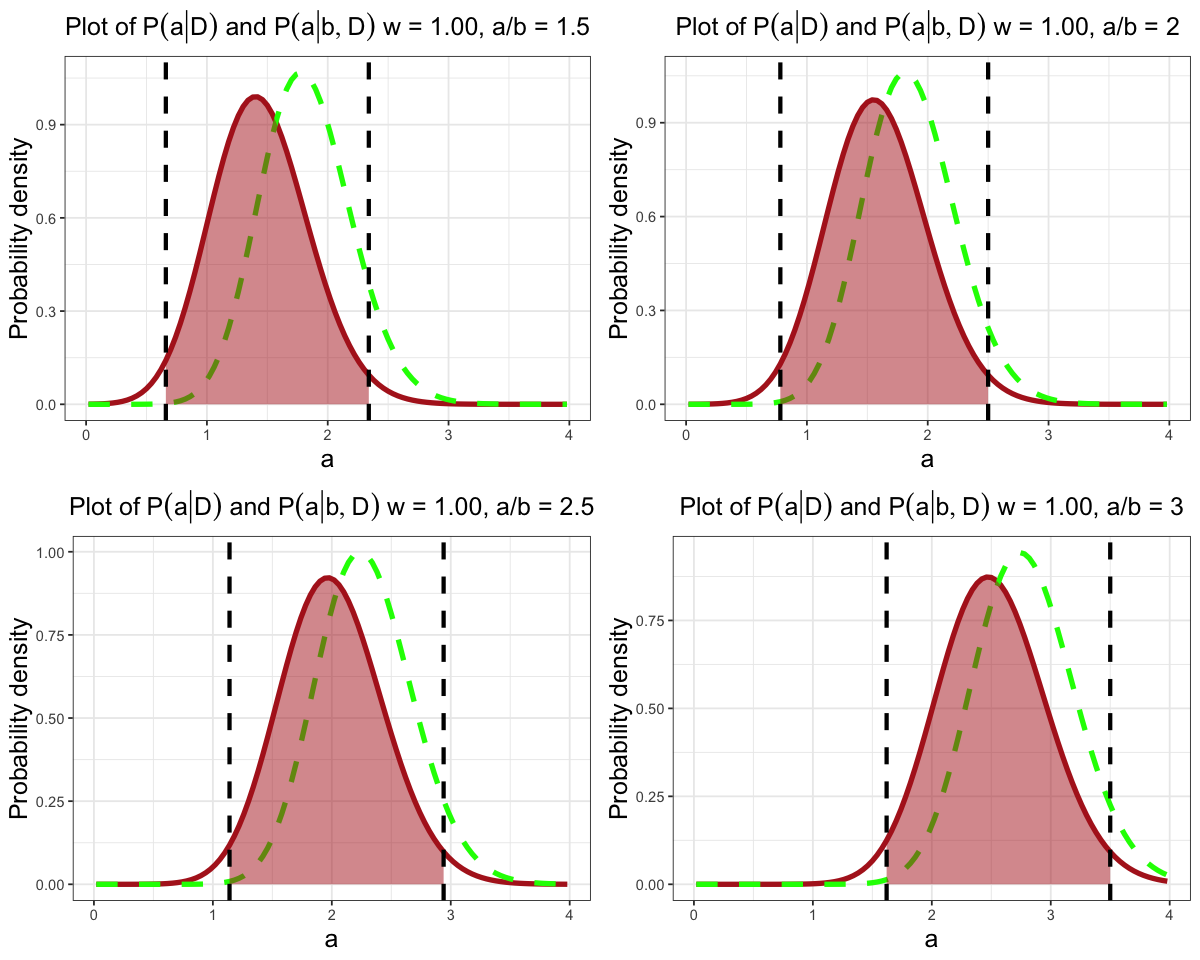

In [52]:
grid.arrange(results_1.5[[2]], results_2[[2]],results_2.5[[2]], results_3[[2]], nrow=2)

In [53]:
ret <- list(results_1.5, results_2, results_2.5, results_3)
w <- rep(1, 4)
a_b <- c(1.5, 2, 2.5, 3)

In [54]:
for (i in 1:4){
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have a = ", w[i], a_b[i]), ret[[i]][[4]][1], "+/-", ret[[i]][[4]][2], "\n") 
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have b = ", w[i], a_b[i]), ret[[i]][[5]][1], "+/-", ret[[i]][[5]][2], "\n") 
    cat(sprintf("with w = %.2f and a_true/b_true = %.2s we have rho = ", w[i], a_b[i]), ret[[i]][[6]], "\n\n")
}

with w = 1.00 and a_true/b_true = 1. we have a =  1.443006 +/- 0.4041889 
with w = 1.00 and a_true/b_true = 1. we have b =  1.23107 +/- 0.1043542 
with w = 1.00 and a_true/b_true = 1. we have rho =  -0.4115928 

with w = 1.00 and a_true/b_true = 2 we have a =  1.590733 +/- 0.4114023 
with w = 1.00 and a_true/b_true = 2 we have b =  1.159114 +/- 0.1048414 
with w = 1.00 and a_true/b_true = 2 we have rho =  -0.4192882 

with w = 1.00 and a_true/b_true = 2. we have a =  2.003931 +/- 0.4340254 
with w = 1.00 and a_true/b_true = 2. we have b =  1.163483 +/- 0.1052555 
with w = 1.00 and a_true/b_true = 2. we have rho =  -0.4053198 

with w = 1.00 and a_true/b_true = 3 we have a =  2.508878 +/- 0.4551183 
with w = 1.00 and a_true/b_true = 3 we have b =  1.158787 +/- 0.1053472 
with w = 1.00 and a_true/b_true = 3 we have rho =  -0.3881021 

